<img src="https://images.efollett.com/htmlroot/images/templates/storeLogos/CA/864.gif" style="float: right;"> 




# ECON628-01 
### Midterm - Take Home



---
#### Guidelines 
- This is your notebook for your take home midterm. 
- This part of your midterm, as you might expect, is **more challenging** so I highly recommend you to work ASAP. 

- You are required to submit your answers using this notebook (do not push or submit PDFs, Word docs, etc, cause your answers will be considered invalid = **0%**).
- The take home is **15%** of your total midterm score.
- You can work in groups of no more than **3** students.
- Your code **should not be the same** as the rest of your classmates we will check (trust me on this!!), if your code is the same as any of your classmate **your grade will be penalized.**
- The take home is due on **March 20** before class/exam (if you are taking the in-class exam before the rest of the class, you **need** to push your take home part before you commence with the in-class exam) = **NO EXCUSES !!**
- Use this [link][1] to **submit/include** the GitHub link to your take home exam.
[1]: https://docs.google.com/forms/d/e/1FAIpQLSfLkZJY80tw303ss8Ga_2sUMVgumAppWb4tYwssGTbr879_Mw/viewform "link"
- If you find a piece of code online (from someone else), and you decide to use in your midterm, you need:
    - Cite the website from where you are getting the code.
    - **Explain on your "own words" what the code is doing.**
    - If you fail to do this, your grade will be **penalized.**
- Finally, you don't need to to create a model
---

#### The data

The state of Iowa provides many data sets on their website, we will be using a dataset which contains transactions for all stores that have a class E liquor license. 

The data , data dictionary can be found [directly on their website](https://data.iowa.gov/Economy/Iowa-Liquor-Sales/m3tr-qhgy).

**However,** since many of you may have had computer issues reading medium size datasets, **everyone** needs to use the 10% dataset version of Iowa liquor sales, located in your dataset folder. 

---

#### Package imports

In [1]:
import numpy as np
import scipy.stats as stats
import pandas as pd
import seaborn as sns

import matplotlib
import matplotlib.pyplot as plt
sns.set_style('darkgrid')


%config InlineBackend.figure_format = 'retina'
%matplotlib inline

plt.style.use('fivethirtyeight')

## 1. Load the data from file

---

In [2]:
iowa_path = '/Users/jjonoja/Desktop/ECON628-01-jjonoja/datasets/iowa_liquor/Iowa_Liquor_sales_sample_10pct.csv'
JJO = pd.read_csv(iowa_path)

## 2. Do an initial overview of the data

---

At the very least describe the columns/variables and the datatypes. 

In [3]:
#Data shape shows column info. All the Codes used in data cleaning process have been obtained from the class notes
JJO.shape

(270955, 18)

In [4]:
JJO.head(5)

,Date,Store Number,City,Zip Code,County Number,County,Category,Category Name,Vendor Number,Item Number,Item Description,Bottle Volume (ml),State Bottle Cost,State Bottle Retail,Bottles Sold,Sale (Dollars),Volume Sold (Liters),Volume Sold (Gallons)
0,11/04/2015,3717,SUMNER,50674,9.0,Bremer,1051100.0,APRICOT BRANDIES,55,54436,Mr. Boston Apricot Brandy,750,$4.50,$6.75,12,$81.00,9.0,2.38
1,03/02/2016,2614,DAVENPORT,52807,82.0,Scott,1011100.0,BLENDED WHISKIES,395,27605,Tin Cup,750,$13.75,$20.63,2,$41.26,1.5,0.40
2,02/11/2016,2106,CEDAR FALLS,50613,7.0,Black Hawk,1011200.0,STRAIGHT BOURBON WHISKIES,65,19067,Jim Beam,1000,$12.59,$18.89,24,$453.36,24.0,6.34
3,02/03/2016,2501,AMES,50010,85.0,Story,1071100.0,AMERICAN COCKTAILS,395,59154,1800 Ultimate Margarita,1750,$9.50,$14.25,6,$85.50,10.5,2.77
4,08/18/2015,3654,BELMOND,50421,99.0,Wright,1031080.0,VODKA 80 PROOF,297,35918,Five O'clock Vodka,1750,$7.20,$10.80,12,$129.60,21.0,5.55


In [5]:
JJO.describe()

,Store Number,County Number,Category,Vendor Number,Item Number,Bottle Volume (ml),Bottles Sold,Volume Sold (Liters),Volume Sold (Gallons)
count,270955.000000,269878.000000,2.708870e+05,270955.00000,270955.000000,270955.000000,270955.000000,270955.000000,270955.000000
mean,3590.263701,57.231642,1.043888e+06,256.43443,45974.963300,924.830341,9.871285,8.981351,2.372830
std,947.662050,27.341205,5.018211e+04,141.01489,52757.043086,493.088489,24.040912,28.913690,7.638182
min,2106.000000,1.000000,1.011100e+06,10.00000,168.000000,50.000000,1.000000,0.100000,0.030000
25%,2604.000000,31.000000,1.012200e+06,115.00000,26827.000000,750.000000,2.000000,1.500000,0.400000
50%,3722.000000,62.000000,1.031200e+06,260.00000,38176.000000,750.000000,6.000000,5.250000,1.390000
75%,4378.000000,77.000000,1.062310e+06,380.00000,64573.000000,1000.000000,12.000000,10.500000,2.770000
max,9023.000000,99.000000,1.701100e+06,978.00000,995507.000000,6000.000000,2508.000000,2508.000000,662.540000


In [6]:
JJO.head(5)

,Date,Store Number,City,Zip Code,County Number,County,Category,Category Name,Vendor Number,Item Number,Item Description,Bottle Volume (ml),State Bottle Cost,State Bottle Retail,Bottles Sold,Sale (Dollars),Volume Sold (Liters),Volume Sold (Gallons)
0,11/04/2015,3717,SUMNER,50674,9.0,Bremer,1051100.0,APRICOT BRANDIES,55,54436,Mr. Boston Apricot Brandy,750,$4.50,$6.75,12,$81.00,9.0,2.38
1,03/02/2016,2614,DAVENPORT,52807,82.0,Scott,1011100.0,BLENDED WHISKIES,395,27605,Tin Cup,750,$13.75,$20.63,2,$41.26,1.5,0.40
2,02/11/2016,2106,CEDAR FALLS,50613,7.0,Black Hawk,1011200.0,STRAIGHT BOURBON WHISKIES,65,19067,Jim Beam,1000,$12.59,$18.89,24,$453.36,24.0,6.34
3,02/03/2016,2501,AMES,50010,85.0,Story,1071100.0,AMERICAN COCKTAILS,395,59154,1800 Ultimate Margarita,1750,$9.50,$14.25,6,$85.50,10.5,2.77
4,08/18/2015,3654,BELMOND,50421,99.0,Wright,1031080.0,VODKA 80 PROOF,297,35918,Five O'clock Vodka,1750,$7.20,$10.80,12,$129.60,21.0,5.55


In [7]:
#I rename all my columns with spacing between variables
JJO.rename(columns={
    "Store Number":"store_number",
    "Zip Code":"zip_code",
    "County Number":"county_number",
    "Category Name":"category_name",
    "Vendor Number":"vendor_number",
    "Item Number":"item_number",
    "Item Description":"item_description",
    "Bottle Volume (ml)":"bottle_volume_(ml)",
    "State Bottle Cost":"state_bottle_cost",
    "State Bottle Retail":"state_bottle_retail",
    "Bottles Sold":"bottles_sold",
    "Sale (Dollars)":"sale_dollars",
    "Volume Sold (Liters)":"volume_sold_liters",
    "Volume Sold (Litters)":"volume_sold_litters",
    "Volume Sold (Gallons)":"volume_sold_galons"


}, inplace=True)

In [8]:
JJO.head(5)

,Date,store_number,City,zip_code,county_number,County,Category,category_name,vendor_number,item_number,item_description,bottle_volume_(ml),state_bottle_cost,state_bottle_retail,bottles_sold,sale_dollars,volume_sold_liters,volume_sold_galons
0,11/04/2015,3717,SUMNER,50674,9.0,Bremer,1051100.0,APRICOT BRANDIES,55,54436,Mr. Boston Apricot Brandy,750,$4.50,$6.75,12,$81.00,9.0,2.38
1,03/02/2016,2614,DAVENPORT,52807,82.0,Scott,1011100.0,BLENDED WHISKIES,395,27605,Tin Cup,750,$13.75,$20.63,2,$41.26,1.5,0.40
2,02/11/2016,2106,CEDAR FALLS,50613,7.0,Black Hawk,1011200.0,STRAIGHT BOURBON WHISKIES,65,19067,Jim Beam,1000,$12.59,$18.89,24,$453.36,24.0,6.34
3,02/03/2016,2501,AMES,50010,85.0,Story,1071100.0,AMERICAN COCKTAILS,395,59154,1800 Ultimate Margarita,1750,$9.50,$14.25,6,$85.50,10.5,2.77
4,08/18/2015,3654,BELMOND,50421,99.0,Wright,1031080.0,VODKA 80 PROOF,297,35918,Five O'clock Vodka,1750,$7.20,$10.80,12,$129.60,21.0,5.55


In [9]:
JJO.describe().T

,count,mean,std,min,25%,50%,75%,max
store_number,270955.0,3.590264e+03,947.662050,2106.00,2604.0,3722.00,4378.00,9023.00
county_number,269878.0,5.723164e+01,27.341205,1.00,31.0,62.00,77.00,99.00
Category,270887.0,1.043888e+06,50182.111075,1011100.00,1012200.0,1031200.00,1062310.00,1701100.00
vendor_number,270955.0,2.564344e+02,141.014890,10.00,115.0,260.00,380.00,978.00
item_number,270955.0,4.597496e+04,52757.043086,168.00,26827.0,38176.00,64573.00,995507.00
bottle_volume_(ml),270955.0,9.248303e+02,493.088489,50.00,750.0,750.00,1000.00,6000.00
bottles_sold,270955.0,9.871285e+00,24.040912,1.00,2.0,6.00,12.00,2508.00
volume_sold_liters,270955.0,8.981351e+00,28.913690,0.10,1.5,5.25,10.50,2508.00
volume_sold_galons,270955.0,2.372830e+00,7.638182,0.03,0.4,1.39,2.77,662.54


In [10]:
# The dataset is browsed to Displayed the number of rows and columns
print JJO.shape
#Searching for missing values in the dataset is then carried out
print JJO.info()

(270955, 18)
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 270955 entries, 0 to 270954
Data columns (total 18 columns):
Date                   270955 non-null object
store_number           270955 non-null int64
City                   270955 non-null object
zip_code               270955 non-null object
county_number          269878 non-null float64
County                 269878 non-null object
Category               270887 non-null float64
category_name          270323 non-null object
vendor_number          270955 non-null int64
item_number            270955 non-null int64
item_description       270955 non-null object
bottle_volume_(ml)     270955 non-null int64
state_bottle_cost      270955 non-null object
state_bottle_retail    270955 non-null object
bottles_sold           270955 non-null int64
sale_dollars           270955 non-null object
volume_sold_liters     270955 non-null float64
volume_sold_galons     270955 non-null float64
dtypes: float64(4), int64(5), object(9)
memory us


## 3. Clean the dataset

---

### 3.1 Identify columns that you will need to convert and clean. Where and how is the data corrupted?

Don't worry about converting the date column to a pandas/numpy "datetime" datatype, unless you want to (not required for these problems and is a challenging thing to work with in its own right.)

In [11]:
#I drop the two categories that are not relevant in my analysis. They seem rather redundant and not as useful as other 
#Columns in the dataset. They seem rather redundant, hence they're dropped as follows:
JJO.drop(['zip_code','bottle_volume_(ml)','vendor_number','volume_sold_liters',], axis=1, inplace=True)

In [12]:
JJO.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 270955 entries, 0 to 270954
Data columns (total 14 columns):
Date                   270955 non-null object
store_number           270955 non-null int64
City                   270955 non-null object
county_number          269878 non-null float64
County                 269878 non-null object
Category               270887 non-null float64
category_name          270323 non-null object
item_number            270955 non-null int64
item_description       270955 non-null object
state_bottle_cost      270955 non-null object
state_bottle_retail    270955 non-null object
bottles_sold           270955 non-null int64
sale_dollars           270955 non-null object
volume_sold_galons     270955 non-null float64
dtypes: float64(3), int64(3), object(8)
memory usage: 28.9+ MB


In [13]:
JJO.isnull().sum()

Date                      0
store_number              0
City                      0
county_number          1077
County                 1077
Category                 68
category_name           632
item_number               0
item_description          0
state_bottle_cost         0
state_bottle_retail       0
bottles_sold              0
sale_dollars              0
volume_sold_galons        0
dtype: int64

### 3.2 Clean the columns

In [14]:
#Two addtitional columns are created for Month and Year to provide better information about the dataframe, Source: Class notes 
JJO['Date'] = pd.to_datetime(JJO['Date'])
JJO['Month'] = JJO['Date'].dt.month
JJO['Year']=JJO['Date'].dt.year
JJO

,Date,store_number,City,county_number,County,Category,category_name,item_number,item_description,state_bottle_cost,state_bottle_retail,bottles_sold,sale_dollars,volume_sold_galons,Month,Year
0,2015-11-04,3717,SUMNER,9.0,Bremer,1051100.0,APRICOT BRANDIES,54436,Mr. Boston Apricot Brandy,$4.50,$6.75,12,$81.00,2.38,11,2015
1,2016-03-02,2614,DAVENPORT,82.0,Scott,1011100.0,BLENDED WHISKIES,27605,Tin Cup,$13.75,$20.63,2,$41.26,0.40,3,2016
2,2016-02-11,2106,CEDAR FALLS,7.0,Black Hawk,1011200.0,STRAIGHT BOURBON WHISKIES,19067,Jim Beam,$12.59,$18.89,24,$453.36,6.34,2,2016
3,2016-02-03,2501,AMES,85.0,Story,1071100.0,AMERICAN COCKTAILS,59154,1800 Ultimate Margarita,$9.50,$14.25,6,$85.50,2.77,2,2016
4,2015-08-18,3654,BELMOND,99.0,Wright,1031080.0,VODKA 80 PROOF,35918,Five O'clock Vodka,$7.20,$10.80,12,$129.60,5.55,8,2015
5,2015-04-20,2569,CEDAR RAPIDS,57.0,Linn,1041100.0,AMERICAN DRY GINS,31473,New Amsterdam Gin,$13.32,$19.98,6,$119.88,2.77,4,2015
6,2015-08-05,2596,OTTUMWA,90.0,Wapello,1051010.0,AMERICAN GRAPE BRANDIES,52806,Korbel Brandy,$6.66,$9.99,3,$29.97,0.59,8,2015
7,2015-06-25,3456,CLEAR LAKE,17.0,Cerro Gordo,1012100.0,CANADIAN WHISKIES,10628,Canadian Club Whisky,$15.75,$23.63,2,$47.26,0.92,6,2015
8,2016-01-04,4757,BONDURANT,77.0,Polk,1032080.0,IMPORTED VODKA,34006,Absolut Swedish Vodka 80 Prf,$11.49,$17.24,4,$68.96,0.79,1,2016
9,2015-11-10,4346,SHELLSBURG,6.0,Benton,1081315.0,CINNAMON SCHNAPPS,82610,Dekuyper Hot Damn!,$7.62,$11.43,2,$22.86,0.53,11,2015


In [15]:
## returning floats of the variables, relacing the $ symbols with blanks. This would aid computation process eventually
JJO['state_bottle_cost'] = JJO['state_bottle_cost'].str.replace('$','')
JJO.state_bottle_cost = JJO.state_bottle_cost.convert_objects(convert_numeric=True)
JJO['state_bottle_retail'] = JJO['state_bottle_retail'].str.replace('$','')
JJO.state_bottle_retail = JJO.state_bottle_retail.convert_objects(convert_numeric=True)
JJO['sale_dollars'] = JJO['sale_dollars'].str.replace('$','')
JJO.sale_dollars = JJO.sale_dollars.convert_objects(convert_numeric=True)

/Users/jjonoja/anaconda/lib/python2.7/site-packages/ipykernel/__main__.py:3: FutureWarning: convert_objects is deprecated.  Use the data-type specific converters pd.to_datetime, pd.to_timedelta and pd.to_numeric.
  app.launch_new_instance()
/Users/jjonoja/anaconda/lib/python2.7/site-packages/ipykernel/__main__.py:5: FutureWarning: convert_objects is deprecated.  Use the data-type specific converters pd.to_datetime, pd.to_timedelta and pd.to_numeric.
/Users/jjonoja/anaconda/lib/python2.7/site-packages/ipykernel/__main__.py:7: FutureWarning: convert_objects is deprecated.  Use the data-type specific converters pd.to_datetime, pd.to_timedelta and pd.to_numeric.


In [16]:
JJO.head(3)

,Date,store_number,City,county_number,County,Category,category_name,item_number,item_description,state_bottle_cost,state_bottle_retail,bottles_sold,sale_dollars,volume_sold_galons,Month,Year
0,2015-11-04,3717,SUMNER,9.0,Bremer,1051100.0,APRICOT BRANDIES,54436,Mr. Boston Apricot Brandy,4.50,6.75,12,81.00,2.38,11,2015
1,2016-03-02,2614,DAVENPORT,82.0,Scott,1011100.0,BLENDED WHISKIES,27605,Tin Cup,13.75,20.63,2,41.26,0.40,3,2016
2,2016-02-11,2106,CEDAR FALLS,7.0,Black Hawk,1011200.0,STRAIGHT BOURBON WHISKIES,19067,Jim Beam,12.59,18.89,24,453.36,6.34,2,2016


In [17]:
#Correlation matrix is obtained for the variables
JJO.corr().T

,store_number,county_number,Category,item_number,state_bottle_cost,state_bottle_retail,bottles_sold,sale_dollars,volume_sold_galons,Month,Year
store_number,1.000000,0.007510,-0.012111,-0.026386,-0.071382,-0.071520,0.014422,-0.017941,-0.017686,0.002676,0.024932
county_number,0.007510,1.000000,-0.006336,0.006810,0.012186,0.012113,0.018945,0.019851,0.010208,-0.001222,0.003098
Category,-0.012111,-0.006336,1.000000,0.116385,-0.013358,-0.013545,-0.000208,0.006382,-0.004367,0.051020,-0.015996
item_number,-0.026386,0.006810,0.116385,1.000000,0.097879,0.097612,-0.004766,0.002987,-0.009545,-0.002323,0.001047
state_bottle_cost,-0.071382,0.012186,-0.013358,0.097879,1.000000,0.999960,-0.062980,0.135931,0.009264,0.012305,0.000503
state_bottle_retail,-0.071520,0.012113,-0.013545,0.097612,0.999960,1.000000,-0.062831,0.136114,0.009705,0.012450,0.000134
bottles_sold,0.014422,0.018945,-0.000208,-0.004766,-0.062980,-0.062831,1.000000,0.825446,0.883378,0.011346,-0.006729
sale_dollars,-0.017941,0.019851,0.006382,0.002987,0.135931,0.136114,0.825446,1.000000,0.846432,0.014762,-0.008540
volume_sold_galons,-0.017686,0.010208,-0.004367,-0.009545,0.009264,0.009705,0.883378,0.846432,1.000000,0.008774,-0.007482
Month,0.002676,-0.001222,0.051020,-0.002323,0.012305,0.012450,0.011346,0.014762,0.008774,1.000000,-0.507424


In [18]:
JJO.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 270955 entries, 0 to 270954
Data columns (total 16 columns):
Date                   270955 non-null datetime64[ns]
store_number           270955 non-null int64
City                   270955 non-null object
county_number          269878 non-null float64
County                 269878 non-null object
Category               270887 non-null float64
category_name          270323 non-null object
item_number            270955 non-null int64
item_description       270955 non-null object
state_bottle_cost      270955 non-null float64
state_bottle_retail    270955 non-null float64
bottles_sold           270955 non-null int64
sale_dollars           270955 non-null float64
volume_sold_galons     270955 non-null float64
Month                  270955 non-null int64
Year                   270955 non-null int64
dtypes: datetime64[ns](1), float64(6), int64(5), object(4)
memory usage: 33.1+ MB



### 3.3 Perform more extensive cleaning of the dataset

Cleaning of data can mean a lot more than just fixing strings and numbers in columns. There are often logical errors with data, useless or nonsensical categories, redundancy of information, outliers, and many more problems.

This dataset has problems beyond just fixing the types of columns. Keep in mind that some types of "data cleaning" is subjective: it's not always a cut-and-dry conversion of type or removal of null values. Subjectivity when dealing with data is just a fact of life when dealing with data. This isn't a kind of programming where things are just right or wrong.

In [19]:
#Volume sales in Galons seems redundant, since there is an alternative unit in meters. Hence, I also drop this column.
#JJO.drop(['Volume Sold (Gallons)',], axis=1, inplace=True)

In [20]:
JJO.isnull().sum()

Date                      0
store_number              0
City                      0
county_number          1077
County                 1077
Category                 68
category_name           632
item_number               0
item_description          0
state_bottle_cost         0
state_bottle_retail       0
bottles_sold              0
sale_dollars              0
volume_sold_galons        0
Month                     0
Year                      0
dtype: int64

In [21]:
#I fill the missing values in county_number, County, Category, and category_name with zero. This is done using the code below
JJO.county_number = JJO.county_number.fillna(0)
#JJO.County = JJO.County.fillna(0)
JJO.Category = JJO.Category.fillna(0)
JJO.category_name = JJO.category_name.fillna(0)


In [22]:
#Checking to verify that the variables has indeed been replaced with zeros
JJO.isnull().sum()   #The result shows the code has been effective as expected.

Date                      0
store_number              0
City                      0
county_number             0
County                 1077
Category                  0
category_name             0
item_number               0
item_description          0
state_bottle_cost         0
state_bottle_retail       0
bottles_sold              0
sale_dollars              0
volume_sold_galons        0
Month                     0
Year                      0
dtype: int64

In [23]:
JJO.describe().T

,count,mean,std,min,25%,50%,75%,max
store_number,270955.0,3.590264e+03,947.662050,2106.00,2604.00,3722.00,4378.00,9023.00
county_number,270955.0,5.700416e+01,27.523405,0.00,31.00,62.00,77.00,99.00
Category,270955.0,1.043626e+06,52830.112852,0.00,1012200.00,1031200.00,1062310.00,1701100.00
item_number,270955.0,4.597496e+04,52757.043086,168.00,26827.00,38176.00,64573.00,995507.00
state_bottle_cost,270955.0,9.773281e+00,7.047119,0.89,5.50,8.00,11.92,425.00
state_bottle_retail,270955.0,1.467576e+01,10.570145,1.34,8.27,12.27,17.88,637.50
bottles_sold,270955.0,9.871285e+00,24.040912,1.00,2.00,6.00,12.00,2508.00
sale_dollars,270955.0,1.289024e+02,383.027369,1.34,30.45,70.56,135.00,36392.40
volume_sold_galons,270955.0,2.372830e+00,7.638182,0.03,0.40,1.39,2.77,662.54
Month,270955.0,5.821103e+00,3.621291,1.00,3.00,5.00,9.00,12.00



## 4. Filter/adjust the store data

---

Some stores may have opened or closed in 2015. These stores will have incorrect yearly summary statistics since they were not open the full year. We need to filter them out or find another way to deal with the inconsistent numbers of months across stores.

It is up to you how you want to deal with this problem.

1. Investigate problematic stores.
2. Decide on an approach to deal with stores not open for the full 2015 year.
3. Implement your plan.
4. Briefly report on what you did and why.


In [24]:
# An index is generated for Year in the dataframe as follows: Source: generated using class note examples
JJO.set_index('Month', 'Year')

,Date,store_number,City,county_number,County,Category,category_name,item_number,item_description,state_bottle_cost,state_bottle_retail,bottles_sold,sale_dollars,volume_sold_galons,Year
Month,,,,,,,,,,,,,,,
11,2015-11-04,3717,SUMNER,9.0,Bremer,1051100.0,APRICOT BRANDIES,54436,Mr. Boston Apricot Brandy,4.50,6.75,12,81.00,2.38,2015
3,2016-03-02,2614,DAVENPORT,82.0,Scott,1011100.0,BLENDED WHISKIES,27605,Tin Cup,13.75,20.63,2,41.26,0.40,2016
2,2016-02-11,2106,CEDAR FALLS,7.0,Black Hawk,1011200.0,STRAIGHT BOURBON WHISKIES,19067,Jim Beam,12.59,18.89,24,453.36,6.34,2016
2,2016-02-03,2501,AMES,85.0,Story,1071100.0,AMERICAN COCKTAILS,59154,1800 Ultimate Margarita,9.50,14.25,6,85.50,2.77,2016
8,2015-08-18,3654,BELMOND,99.0,Wright,1031080.0,VODKA 80 PROOF,35918,Five O'clock Vodka,7.20,10.80,12,129.60,5.55,2015
4,2015-04-20,2569,CEDAR RAPIDS,57.0,Linn,1041100.0,AMERICAN DRY GINS,31473,New Amsterdam Gin,13.32,19.98,6,119.88,2.77,2015
8,2015-08-05,2596,OTTUMWA,90.0,Wapello,1051010.0,AMERICAN GRAPE BRANDIES,52806,Korbel Brandy,6.66,9.99,3,29.97,0.59,2015
6,2015-06-25,3456,CLEAR LAKE,17.0,Cerro Gordo,1012100.0,CANADIAN WHISKIES,10628,Canadian Club Whisky,15.75,23.63,2,47.26,0.92,2015
1,2016-01-04,4757,BONDURANT,77.0,Polk,1032080.0,IMPORTED VODKA,34006,Absolut Swedish Vodka 80 Prf,11.49,17.24,4,68.96,0.79,2016


In [25]:
#Splitting my data frame into 2015 and 2016 separately
JJO_15= JJO[(JJO.Year == 2015)]
JJO_16= JJO[(JJO.Year == 2016)]

In [26]:
#Creating an index to verify periods of the year when stores were operational during 2015 and 2016 
JJO_15.groupby(['store_number','Year'])['Month'].nunique().reset_index()

,store_number,Year,Month
0,2106,2015,12
1,2113,2015,12
2,2130,2015,12
3,2152,2015,12
4,2178,2015,12
5,2190,2015,12
6,2191,2015,12
7,2200,2015,12
8,2205,2015,12
9,2228,2015,12


### After investigating to find months of the year in which each store operated in both 2015 and 2016 respectively, I am decide not to drop stores that did not operate for the entirety of the year. This is because 2016 had data for only 3 months (first quarter) of the year. Droping stores that operates for just one month means eliminating 1/3 of the data frame, which seems rather unnecessary. Conversely, it would have made sense to drop stores that operated below 4 months in 2015 but again, the fact that first quarter data is imperative in drawing any comparative analysis betweeen 2015 and 2016.  Hence, I'm keeping all the observations in the dataset, with the assumption that keeping them doesn't influence or bias the results and computations being generated from the dataset.

In [27]:
JJO_16.groupby(['store_number','Year'])['Month'].nunique().reset_index()

,store_number,Year,Month
0,2106,2016,3
1,2113,2016,3
2,2130,2016,3
3,2152,2016,3
4,2178,2016,3
5,2190,2016,3
6,2191,2016,3
7,2200,2016,3
8,2228,2016,3
9,2233,2016,3



## 5. Case 1 - Proposals for new tax rates 

---

You are an economist working for the Iowa State tax board. The Iowa State legislature is considering changes in the liquor tax rates and has assigned you to the project.

### 5.1 Calculate yearly liquor sales for each store in 2015.

In [28]:
#Yearly liquor sales for each store in 2015 is generated as follows:
JJO[JJO['Year'] == 2015]


,Date,store_number,City,county_number,County,Category,category_name,item_number,item_description,state_bottle_cost,state_bottle_retail,bottles_sold,sale_dollars,volume_sold_galons,Month,Year
0,2015-11-04,3717,SUMNER,9.0,Bremer,1051100.0,APRICOT BRANDIES,54436,Mr. Boston Apricot Brandy,4.50,6.75,12,81.00,2.38,11,2015
4,2015-08-18,3654,BELMOND,99.0,Wright,1031080.0,VODKA 80 PROOF,35918,Five O'clock Vodka,7.20,10.80,12,129.60,5.55,8,2015
5,2015-04-20,2569,CEDAR RAPIDS,57.0,Linn,1041100.0,AMERICAN DRY GINS,31473,New Amsterdam Gin,13.32,19.98,6,119.88,2.77,4,2015
6,2015-08-05,2596,OTTUMWA,90.0,Wapello,1051010.0,AMERICAN GRAPE BRANDIES,52806,Korbel Brandy,6.66,9.99,3,29.97,0.59,8,2015
7,2015-06-25,3456,CLEAR LAKE,17.0,Cerro Gordo,1012100.0,CANADIAN WHISKIES,10628,Canadian Club Whisky,15.75,23.63,2,47.26,0.92,6,2015
9,2015-11-10,4346,SHELLSBURG,6.0,Benton,1081315.0,CINNAMON SCHNAPPS,82610,Dekuyper Hot Damn!,7.62,11.43,2,22.86,0.53,11,2015
10,2015-09-28,2648,WEST DES MOINES,77.0,Polk,1011250.0,SINGLE BARREL BOURBON WHISKIES,19235,Knob Creek Single Barrel Reserve,26.24,39.36,6,236.16,1.19,9,2015
11,2015-10-28,2600,OSKALOOSA,62.0,Mahaska,1071100.0,AMERICAN COCKTAILS,57148,Chi-Chi's Margarita W/tequila,6.00,9.25,6,55.50,2.77,10,2015
12,2015-01-22,3858,DAVENPORT,82.0,Scott,1012100.0,CANADIAN WHISKIES,15248,Windsor Canadian Pet,8.92,13.38,1,13.38,0.46,1,2015
15,2015-06-10,3717,SUMNER,9.0,Bremer,1051100.0,APRICOT BRANDIES,54436,Mr. Boston Apricot Brandy,4.50,6.75,4,27.00,0.79,6,2015


In [29]:
#Yearly liquor sales for each store in 2016 is generated as follows:

JJO[JJO['Year'] == 2016]

,Date,store_number,City,county_number,County,Category,category_name,item_number,item_description,state_bottle_cost,state_bottle_retail,bottles_sold,sale_dollars,volume_sold_galons,Month,Year
1,2016-03-02,2614,DAVENPORT,82.0,Scott,1011100.0,BLENDED WHISKIES,27605,Tin Cup,13.75,20.63,2,41.26,0.40,3,2016
2,2016-02-11,2106,CEDAR FALLS,7.0,Black Hawk,1011200.0,STRAIGHT BOURBON WHISKIES,19067,Jim Beam,12.59,18.89,24,453.36,6.34,2,2016
3,2016-02-03,2501,AMES,85.0,Story,1071100.0,AMERICAN COCKTAILS,59154,1800 Ultimate Margarita,9.50,14.25,6,85.50,2.77,2,2016
8,2016-01-04,4757,BONDURANT,77.0,Polk,1032080.0,IMPORTED VODKA,34006,Absolut Swedish Vodka 80 Prf,11.49,17.24,4,68.96,0.79,1,2016
13,2016-02-29,4673,WEST POINT,56.0,Lee,1081300.0,PEPPERMINT SCHNAPPS,75211,Kinky Liqueur,10.00,15.00,12,180.00,2.38,2,2016
14,2016-01-04,2670,CORALVILLE,52.0,Johnson,1031200.0,VODKA FLAVORED,41705,Uv Red (cherry) Vodka,7.50,11.25,12,135.00,3.17,1,2016
16,2016-02-25,2130,WATERLOO,7.0,Black Hawk,1031100.0,100 PROOF VODKA,35913,Five O'clock Vodka,1.13,1.70,48,81.60,2.54,2,2016
24,2016-03-14,2618,CEDAR RAPIDS,57.0,Linn,1031080.0,VODKA 80 PROOF,35926,Five O'clock PET Vodka,3.37,5.06,12,60.72,2.38,3,2016
38,2016-01-27,2637,DAVENPORT,82.0,Scott,1081900.0,MISC. AMERICAN CORDIALS & LIQUEURS,77759,Viniq Ruby,6.50,9.75,12,117.00,1.19,1,2016
39,2016-03-07,2633,DES MOINES,77.0,Polk,1011200.0,STRAIGHT BOURBON WHISKIES,22157,Wild Turkey 101,16.16,24.24,12,290.88,3.17,3,2016


In [30]:
#Splitting my data frame into 2015 and 2016 separately
JJO_15= JJO[(JJO.Year == 2015)]
JJO_16= JJO[(JJO.Year == 2016)]

In [31]:
JJO_15[['sale_dollars', 'Month', 'Year']]

,sale_dollars,Month,Year
0,81.00,11,2015
4,129.60,8,2015
5,119.88,4,2015
6,29.97,8,2015
7,47.26,6,2015
9,22.86,11,2015
10,236.16,9,2015
11,55.50,10,2015
12,13.38,1,2015
15,27.00,6,2015


In [32]:
#Liquor sales in 2016 is generated as follows
JJO_16[['sale_dollars', 'Month', 'Year']]

,sale_dollars,Month,Year
1,41.26,3,2016
2,453.36,2,2016
3,85.50,2,2016
8,68.96,1,2016
13,180.00,2,2016
14,135.00,1,2016
16,81.60,2,2016
24,60.72,3,2016
38,117.00,1,2016
39,290.88,3,2016


In [33]:
#JJO[JJO['Year'] == 2016]

In [34]:
JJO_15.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 218594 entries, 0 to 270954
Data columns (total 16 columns):
Date                   218594 non-null datetime64[ns]
store_number           218594 non-null int64
City                   218594 non-null object
county_number          218594 non-null float64
County                 218477 non-null object
Category               218594 non-null float64
category_name          218594 non-null object
item_number            218594 non-null int64
item_description       218594 non-null object
state_bottle_cost      218594 non-null float64
state_bottle_retail    218594 non-null float64
bottles_sold           218594 non-null int64
sale_dollars           218594 non-null float64
volume_sold_galons     218594 non-null float64
Month                  218594 non-null int64
Year                   218594 non-null int64
dtypes: datetime64[ns](1), float64(6), int64(5), object(4)
memory usage: 28.4+ MB


### 5.2 Calculate the profit each store is making in 2015.


In [35]:
#Calculating the total cost for each store in 2015 is done as follows
JJO_15['total_cost_15'] = JJO_15.state_bottle_cost * JJO_15.bottles_sold
JJO_15

/Users/jjonoja/anaconda/lib/python2.7/site-packages/ipykernel/__main__.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  from ipykernel import kernelapp as app


,Date,store_number,City,county_number,County,Category,category_name,item_number,item_description,state_bottle_cost,state_bottle_retail,bottles_sold,sale_dollars,volume_sold_galons,Month,Year,total_cost_15
0,2015-11-04,3717,SUMNER,9.0,Bremer,1051100.0,APRICOT BRANDIES,54436,Mr. Boston Apricot Brandy,4.50,6.75,12,81.00,2.38,11,2015,54.00
4,2015-08-18,3654,BELMOND,99.0,Wright,1031080.0,VODKA 80 PROOF,35918,Five O'clock Vodka,7.20,10.80,12,129.60,5.55,8,2015,86.40
5,2015-04-20,2569,CEDAR RAPIDS,57.0,Linn,1041100.0,AMERICAN DRY GINS,31473,New Amsterdam Gin,13.32,19.98,6,119.88,2.77,4,2015,79.92
6,2015-08-05,2596,OTTUMWA,90.0,Wapello,1051010.0,AMERICAN GRAPE BRANDIES,52806,Korbel Brandy,6.66,9.99,3,29.97,0.59,8,2015,19.98
7,2015-06-25,3456,CLEAR LAKE,17.0,Cerro Gordo,1012100.0,CANADIAN WHISKIES,10628,Canadian Club Whisky,15.75,23.63,2,47.26,0.92,6,2015,31.50
9,2015-11-10,4346,SHELLSBURG,6.0,Benton,1081315.0,CINNAMON SCHNAPPS,82610,Dekuyper Hot Damn!,7.62,11.43,2,22.86,0.53,11,2015,15.24
10,2015-09-28,2648,WEST DES MOINES,77.0,Polk,1011250.0,SINGLE BARREL BOURBON WHISKIES,19235,Knob Creek Single Barrel Reserve,26.24,39.36,6,236.16,1.19,9,2015,157.44
11,2015-10-28,2600,OSKALOOSA,62.0,Mahaska,1071100.0,AMERICAN COCKTAILS,57148,Chi-Chi's Margarita W/tequila,6.00,9.25,6,55.50,2.77,10,2015,36.00
12,2015-01-22,3858,DAVENPORT,82.0,Scott,1012100.0,CANADIAN WHISKIES,15248,Windsor Canadian Pet,8.92,13.38,1,13.38,0.46,1,2015,8.92
15,2015-06-10,3717,SUMNER,9.0,Bremer,1051100.0,APRICOT BRANDIES,54436,Mr. Boston Apricot Brandy,4.50,6.75,4,27.00,0.79,6,2015,18.00


In [36]:
#Calculating the total cost for each store in 2016 is done as follows
JJO_16['total_cost_16'] = JJO_16.state_bottle_cost * JJO_16.bottles_sold
JJO_16

/Users/jjonoja/anaconda/lib/python2.7/site-packages/ipykernel/__main__.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  from ipykernel import kernelapp as app


,Date,store_number,City,county_number,County,Category,category_name,item_number,item_description,state_bottle_cost,state_bottle_retail,bottles_sold,sale_dollars,volume_sold_galons,Month,Year,total_cost_16
1,2016-03-02,2614,DAVENPORT,82.0,Scott,1011100.0,BLENDED WHISKIES,27605,Tin Cup,13.75,20.63,2,41.26,0.40,3,2016,27.50
2,2016-02-11,2106,CEDAR FALLS,7.0,Black Hawk,1011200.0,STRAIGHT BOURBON WHISKIES,19067,Jim Beam,12.59,18.89,24,453.36,6.34,2,2016,302.16
3,2016-02-03,2501,AMES,85.0,Story,1071100.0,AMERICAN COCKTAILS,59154,1800 Ultimate Margarita,9.50,14.25,6,85.50,2.77,2,2016,57.00
8,2016-01-04,4757,BONDURANT,77.0,Polk,1032080.0,IMPORTED VODKA,34006,Absolut Swedish Vodka 80 Prf,11.49,17.24,4,68.96,0.79,1,2016,45.96
13,2016-02-29,4673,WEST POINT,56.0,Lee,1081300.0,PEPPERMINT SCHNAPPS,75211,Kinky Liqueur,10.00,15.00,12,180.00,2.38,2,2016,120.00
14,2016-01-04,2670,CORALVILLE,52.0,Johnson,1031200.0,VODKA FLAVORED,41705,Uv Red (cherry) Vodka,7.50,11.25,12,135.00,3.17,1,2016,90.00
16,2016-02-25,2130,WATERLOO,7.0,Black Hawk,1031100.0,100 PROOF VODKA,35913,Five O'clock Vodka,1.13,1.70,48,81.60,2.54,2,2016,54.24
24,2016-03-14,2618,CEDAR RAPIDS,57.0,Linn,1031080.0,VODKA 80 PROOF,35926,Five O'clock PET Vodka,3.37,5.06,12,60.72,2.38,3,2016,40.44
38,2016-01-27,2637,DAVENPORT,82.0,Scott,1081900.0,MISC. AMERICAN CORDIALS & LIQUEURS,77759,Viniq Ruby,6.50,9.75,12,117.00,1.19,1,2016,78.00
39,2016-03-07,2633,DES MOINES,77.0,Polk,1011200.0,STRAIGHT BOURBON WHISKIES,22157,Wild Turkey 101,16.16,24.24,12,290.88,3.17,3,2016,193.92


In [37]:
#Profit made by each store in 2015 obtained from difference between state_bottle_retail and state_bottle_cost. 
JJO_15['profit_15'] = JJO_15.sale_dollars- JJO_15.total_cost_15
JJO_15

/Users/jjonoja/anaconda/lib/python2.7/site-packages/ipykernel/__main__.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  from ipykernel import kernelapp as app


,Date,store_number,City,county_number,County,Category,category_name,item_number,item_description,state_bottle_cost,state_bottle_retail,bottles_sold,sale_dollars,volume_sold_galons,Month,Year,total_cost_15,profit_15
0,2015-11-04,3717,SUMNER,9.0,Bremer,1051100.0,APRICOT BRANDIES,54436,Mr. Boston Apricot Brandy,4.50,6.75,12,81.00,2.38,11,2015,54.00,27.00
4,2015-08-18,3654,BELMOND,99.0,Wright,1031080.0,VODKA 80 PROOF,35918,Five O'clock Vodka,7.20,10.80,12,129.60,5.55,8,2015,86.40,43.20
5,2015-04-20,2569,CEDAR RAPIDS,57.0,Linn,1041100.0,AMERICAN DRY GINS,31473,New Amsterdam Gin,13.32,19.98,6,119.88,2.77,4,2015,79.92,39.96
6,2015-08-05,2596,OTTUMWA,90.0,Wapello,1051010.0,AMERICAN GRAPE BRANDIES,52806,Korbel Brandy,6.66,9.99,3,29.97,0.59,8,2015,19.98,9.99
7,2015-06-25,3456,CLEAR LAKE,17.0,Cerro Gordo,1012100.0,CANADIAN WHISKIES,10628,Canadian Club Whisky,15.75,23.63,2,47.26,0.92,6,2015,31.50,15.76
9,2015-11-10,4346,SHELLSBURG,6.0,Benton,1081315.0,CINNAMON SCHNAPPS,82610,Dekuyper Hot Damn!,7.62,11.43,2,22.86,0.53,11,2015,15.24,7.62
10,2015-09-28,2648,WEST DES MOINES,77.0,Polk,1011250.0,SINGLE BARREL BOURBON WHISKIES,19235,Knob Creek Single Barrel Reserve,26.24,39.36,6,236.16,1.19,9,2015,157.44,78.72
11,2015-10-28,2600,OSKALOOSA,62.0,Mahaska,1071100.0,AMERICAN COCKTAILS,57148,Chi-Chi's Margarita W/tequila,6.00,9.25,6,55.50,2.77,10,2015,36.00,19.50
12,2015-01-22,3858,DAVENPORT,82.0,Scott,1012100.0,CANADIAN WHISKIES,15248,Windsor Canadian Pet,8.92,13.38,1,13.38,0.46,1,2015,8.92,4.46
15,2015-06-10,3717,SUMNER,9.0,Bremer,1051100.0,APRICOT BRANDIES,54436,Mr. Boston Apricot Brandy,4.50,6.75,4,27.00,0.79,6,2015,18.00,9.00


In [38]:
#Profit made by each store in 2016 obtained from difference between state_bottle_retail and state_bottle_cost. 
JJO_16['profit_16'] = JJO_16.sale_dollars- JJO_16.total_cost_16
JJO_16

/Users/jjonoja/anaconda/lib/python2.7/site-packages/ipykernel/__main__.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  from ipykernel import kernelapp as app


,Date,store_number,City,county_number,County,Category,category_name,item_number,item_description,state_bottle_cost,state_bottle_retail,bottles_sold,sale_dollars,volume_sold_galons,Month,Year,total_cost_16,profit_16
1,2016-03-02,2614,DAVENPORT,82.0,Scott,1011100.0,BLENDED WHISKIES,27605,Tin Cup,13.75,20.63,2,41.26,0.40,3,2016,27.50,13.76
2,2016-02-11,2106,CEDAR FALLS,7.0,Black Hawk,1011200.0,STRAIGHT BOURBON WHISKIES,19067,Jim Beam,12.59,18.89,24,453.36,6.34,2,2016,302.16,151.20
3,2016-02-03,2501,AMES,85.0,Story,1071100.0,AMERICAN COCKTAILS,59154,1800 Ultimate Margarita,9.50,14.25,6,85.50,2.77,2,2016,57.00,28.50
8,2016-01-04,4757,BONDURANT,77.0,Polk,1032080.0,IMPORTED VODKA,34006,Absolut Swedish Vodka 80 Prf,11.49,17.24,4,68.96,0.79,1,2016,45.96,23.00
13,2016-02-29,4673,WEST POINT,56.0,Lee,1081300.0,PEPPERMINT SCHNAPPS,75211,Kinky Liqueur,10.00,15.00,12,180.00,2.38,2,2016,120.00,60.00
14,2016-01-04,2670,CORALVILLE,52.0,Johnson,1031200.0,VODKA FLAVORED,41705,Uv Red (cherry) Vodka,7.50,11.25,12,135.00,3.17,1,2016,90.00,45.00
16,2016-02-25,2130,WATERLOO,7.0,Black Hawk,1031100.0,100 PROOF VODKA,35913,Five O'clock Vodka,1.13,1.70,48,81.60,2.54,2,2016,54.24,27.36
24,2016-03-14,2618,CEDAR RAPIDS,57.0,Linn,1031080.0,VODKA 80 PROOF,35926,Five O'clock PET Vodka,3.37,5.06,12,60.72,2.38,3,2016,40.44,20.28
38,2016-01-27,2637,DAVENPORT,82.0,Scott,1081900.0,MISC. AMERICAN CORDIALS & LIQUEURS,77759,Viniq Ruby,6.50,9.75,12,117.00,1.19,1,2016,78.00,39.00
39,2016-03-07,2633,DES MOINES,77.0,Polk,1011200.0,STRAIGHT BOURBON WHISKIES,22157,Wild Turkey 101,16.16,24.24,12,290.88,3.17,3,2016,193.92,96.96


In [39]:
JJO_15.groupby(['store_number']).sum()['profit_15'].reset_index()

,store_number,profit_15
0,2106,48838.08
1,2113,3109.04
2,2130,37325.20
3,2152,2587.53
4,2178,8165.70
5,2190,40617.73
6,2191,41744.39
7,2200,7653.47
8,2205,8244.13
9,2228,5844.34


### 5.3 Investigate which Iowa counties are making the most profit on liquor per gallon in 2015.

In [40]:
JJO_15.groupby(['County', 'Year'], sort=True)[['profit_15']].sum().sort_values(by=['profit_15'], ascending=False).reset_index()

,County,Year,profit_15
0,Polk,2015,2139175.98
1,Linn,2015,870999.67
2,Scott,2015,682628.41
3,Johnson,2015,574499.31
4,Black Hawk,2015,529097.01
5,Pottawattamie,2015,338436.55
6,Woodbury,2015,334297.05
7,Dubuque,2015,297710.63
8,Story,2015,296680.57
9,Cerro Gordo,2015,190844.15


In [41]:
JJO_16.groupby(['County', 'Year'], sort=True)[['profit_16']].sum().sort_values(by=['profit_16'], ascending=False).reset_index()

,County,Year,profit_16
0,Polk,2016,461528.69
1,Linn,2016,181582.13
2,Scott,2016,141647.56
3,Johnson,2016,123922.84
4,Black Hawk,2016,118022.92
5,Pottawattamie,2016,89177.93
6,Woodbury,2016,84422.20
7,Dubuque,2016,64611.03
8,Story,2016,62784.60
9,Cerro Gordo,2016,42080.13


### from the above table, we see that the top three counties by profit margins were Polk, Linn,  Scott, Johnson and black Hawk respectively. In 2016, the same trend is maintained as in the previous year.

### 5.4  Does profit scale proportionally to store size?

Size of a store can be defined as the total gallons sold in 2015. Is the profit to store size ratio increasing as store size increases? Decreasing? Consistent?

In [42]:
gallon_per_store15 = JJO_15.groupby(['store_number']).sum()['volume_sold_galons'].reset_index()
gallon_per_store16 = JJO_16.groupby(['store_number']).sum()['volume_sold_galons'].reset_index()
JJO_15

,Date,store_number,City,county_number,County,Category,category_name,item_number,item_description,state_bottle_cost,state_bottle_retail,bottles_sold,sale_dollars,volume_sold_galons,Month,Year,total_cost_15,profit_15
0,2015-11-04,3717,SUMNER,9.0,Bremer,1051100.0,APRICOT BRANDIES,54436,Mr. Boston Apricot Brandy,4.50,6.75,12,81.00,2.38,11,2015,54.00,27.00
4,2015-08-18,3654,BELMOND,99.0,Wright,1031080.0,VODKA 80 PROOF,35918,Five O'clock Vodka,7.20,10.80,12,129.60,5.55,8,2015,86.40,43.20
5,2015-04-20,2569,CEDAR RAPIDS,57.0,Linn,1041100.0,AMERICAN DRY GINS,31473,New Amsterdam Gin,13.32,19.98,6,119.88,2.77,4,2015,79.92,39.96
6,2015-08-05,2596,OTTUMWA,90.0,Wapello,1051010.0,AMERICAN GRAPE BRANDIES,52806,Korbel Brandy,6.66,9.99,3,29.97,0.59,8,2015,19.98,9.99
7,2015-06-25,3456,CLEAR LAKE,17.0,Cerro Gordo,1012100.0,CANADIAN WHISKIES,10628,Canadian Club Whisky,15.75,23.63,2,47.26,0.92,6,2015,31.50,15.76
9,2015-11-10,4346,SHELLSBURG,6.0,Benton,1081315.0,CINNAMON SCHNAPPS,82610,Dekuyper Hot Damn!,7.62,11.43,2,22.86,0.53,11,2015,15.24,7.62
10,2015-09-28,2648,WEST DES MOINES,77.0,Polk,1011250.0,SINGLE BARREL BOURBON WHISKIES,19235,Knob Creek Single Barrel Reserve,26.24,39.36,6,236.16,1.19,9,2015,157.44,78.72
11,2015-10-28,2600,OSKALOOSA,62.0,Mahaska,1071100.0,AMERICAN COCKTAILS,57148,Chi-Chi's Margarita W/tequila,6.00,9.25,6,55.50,2.77,10,2015,36.00,19.50
12,2015-01-22,3858,DAVENPORT,82.0,Scott,1012100.0,CANADIAN WHISKIES,15248,Windsor Canadian Pet,8.92,13.38,1,13.38,0.46,1,2015,8.92,4.46
15,2015-06-10,3717,SUMNER,9.0,Bremer,1051100.0,APRICOT BRANDIES,54436,Mr. Boston Apricot Brandy,4.50,6.75,4,27.00,0.79,6,2015,18.00,9.00


In [43]:
gallon_per_store15.rename(columns={
    "volume_sold_galons":"gallon_per_store"
    },inplace=True)


In [44]:
gallon_per_store16.rename(columns={
    "volume_sold_galons":"gallon_per_store"
    },inplace=True)
JJO_16

,Date,store_number,City,county_number,County,Category,category_name,item_number,item_description,state_bottle_cost,state_bottle_retail,bottles_sold,sale_dollars,volume_sold_galons,Month,Year,total_cost_16,profit_16
1,2016-03-02,2614,DAVENPORT,82.0,Scott,1011100.0,BLENDED WHISKIES,27605,Tin Cup,13.75,20.63,2,41.26,0.40,3,2016,27.50,13.76
2,2016-02-11,2106,CEDAR FALLS,7.0,Black Hawk,1011200.0,STRAIGHT BOURBON WHISKIES,19067,Jim Beam,12.59,18.89,24,453.36,6.34,2,2016,302.16,151.20
3,2016-02-03,2501,AMES,85.0,Story,1071100.0,AMERICAN COCKTAILS,59154,1800 Ultimate Margarita,9.50,14.25,6,85.50,2.77,2,2016,57.00,28.50
8,2016-01-04,4757,BONDURANT,77.0,Polk,1032080.0,IMPORTED VODKA,34006,Absolut Swedish Vodka 80 Prf,11.49,17.24,4,68.96,0.79,1,2016,45.96,23.00
13,2016-02-29,4673,WEST POINT,56.0,Lee,1081300.0,PEPPERMINT SCHNAPPS,75211,Kinky Liqueur,10.00,15.00,12,180.00,2.38,2,2016,120.00,60.00
14,2016-01-04,2670,CORALVILLE,52.0,Johnson,1031200.0,VODKA FLAVORED,41705,Uv Red (cherry) Vodka,7.50,11.25,12,135.00,3.17,1,2016,90.00,45.00
16,2016-02-25,2130,WATERLOO,7.0,Black Hawk,1031100.0,100 PROOF VODKA,35913,Five O'clock Vodka,1.13,1.70,48,81.60,2.54,2,2016,54.24,27.36
24,2016-03-14,2618,CEDAR RAPIDS,57.0,Linn,1031080.0,VODKA 80 PROOF,35926,Five O'clock PET Vodka,3.37,5.06,12,60.72,2.38,3,2016,40.44,20.28
38,2016-01-27,2637,DAVENPORT,82.0,Scott,1081900.0,MISC. AMERICAN CORDIALS & LIQUEURS,77759,Viniq Ruby,6.50,9.75,12,117.00,1.19,1,2016,78.00,39.00
39,2016-03-07,2633,DES MOINES,77.0,Polk,1011200.0,STRAIGHT BOURBON WHISKIES,22157,Wild Turkey 101,16.16,24.24,12,290.88,3.17,3,2016,193.92,96.96


In [45]:
#JJO_16=pd.merge(JJO_16,gallon_per_store,on=['store_number'],how='right')
#JJO_16

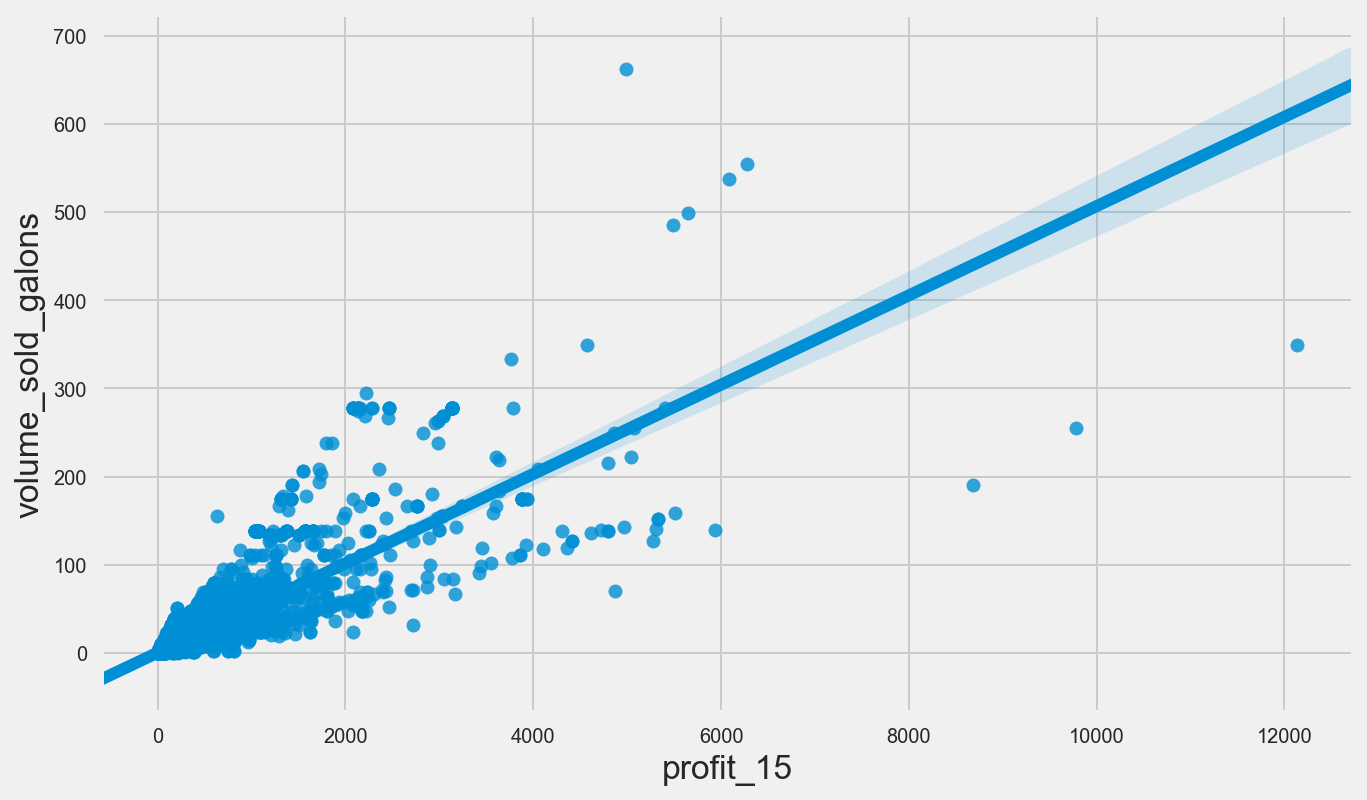

In [46]:
fig = plt.figure(figsize=(10,6))
sns.regplot(JJO_15['profit_15'], JJO_15['volume_sold_galons'], data=JJO_15)
plt.show()

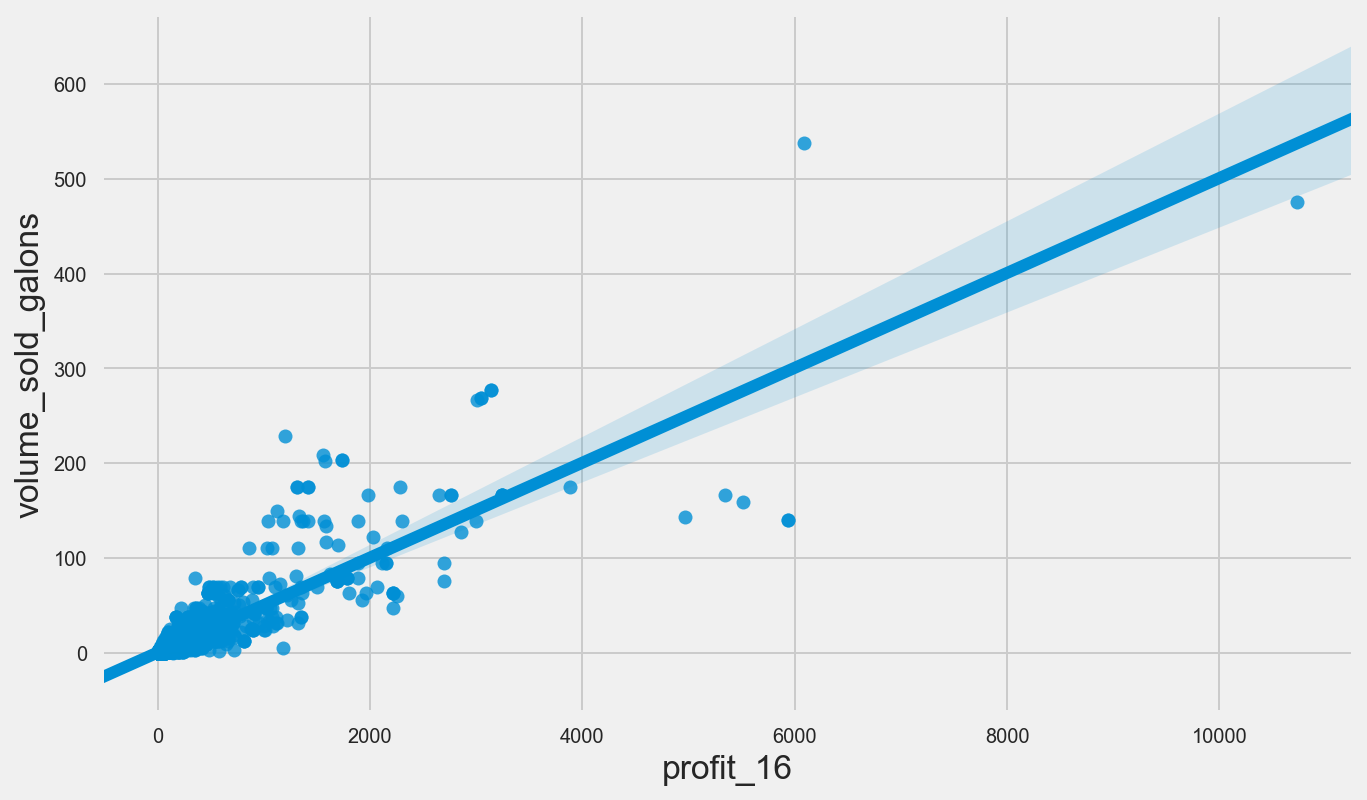

In [47]:
fig = plt.figure(figsize=(10,6))
sns.regplot(JJO_16['profit_16'], JJO_16['volume_sold_galons'], data=JJO_16)
plt.show()

from the graph above, we can infer that there is a positive relationship between the profit generated by the stores in  and the volume of gallons of Liquor sales in both 2015 and 2016. We observe outliers in the pattern of distribution, with some level of clustering arount.

### 5.5 Create a broader category for liquor type.

Liquor types are pretty granular in this dataset. Create a column that categorizes these types into a smaller amount of categories. The categories you decide on are up to you.

In [48]:
JJO_15.groupby(['category_name','Year'], sort=True)[['volume_sold_galons']].sum().sort_values(by=['volume_sold_galons'], ascending=False).reset_index()


,category_name,Year,volume_sold_galons
0,VODKA 80 PROOF,2015,107403.06
1,CANADIAN WHISKIES,2015,72749.82
2,SPICED RUM,2015,38565.95
3,WHISKEY LIQUEUR,2015,22492.58
4,STRAIGHT BOURBON WHISKIES,2015,22165.95
5,PUERTO RICO & VIRGIN ISLANDS RUM,2015,21940.39
6,BLENDED WHISKIES,2015,21931.86
7,IMPORTED VODKA,2015,21227.70
8,TEQUILA,2015,20320.57
9,AMERICAN COCKTAILS,2015,18313.58


In [49]:
JJO_16.groupby(['category_name','Year'], sort=True)[['volume_sold_galons']].sum().sort_values(by=['volume_sold_galons'], ascending=False).reset_index()


,category_name,Year,volume_sold_galons
0,VODKA 80 PROOF,2016,23695.07
1,CANADIAN WHISKIES,2016,16410.78
2,SPICED RUM,2016,8245.19
3,WHISKEY LIQUEUR,2016,5788.40
4,BLENDED WHISKIES,2016,5205.70
5,STRAIGHT BOURBON WHISKIES,2016,4883.05
6,IMPORTED VODKA,2016,4510.81
7,PUERTO RICO & VIRGIN ISLANDS RUM,2016,4460.12
8,TEQUILA,2016,4226.36
9,AMERICAN COCKTAILS,2016,3577.92


In [50]:
#Based on the broad categories of liqour presented, the broad brand types is generated with Shiv as follows:

JJO_15['liquor_Group'] = np.where(JJO_15['category_name'].str.contains('BRANDIES'), "BRANDY",
            np.where(JJO_15['category_name'].str.contains('WHISKIES'), "WHISKY",
            np.where(JJO_15['category_name'].str.contains('SCHNAPPS'), "SCHNAPPS",  
            np.where(JJO_15['category_name'].str.contains('SCOTCH'), "SCOTCH",
            np.where(JJO_15['category_name'].str.contains('GINS'), "GIN",
            np.where(JJO_15['category_name'].str.contains('VODKA'), "VODKA",
            np.where(JJO_15['category_name'].str.contains('LIQUEUR'), "CORDIALS",         
            np.where(JJO_15['category_name'].str.contains('RUM'), "RUM", "OTHERS" ))))))))
JJO_15.groupby(['liquor_Group']).count()['Category'].reset_index()


/Users/jjonoja/anaconda/lib/python2.7/site-packages/ipykernel/__main__.py:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy


,liquor_Group,Category
0,BRANDY,12254
1,CORDIALS,23410
2,GIN,8147
3,OTHERS,21293
4,RUM,26544
5,SCHNAPPS,11505
6,SCOTCH,1915
7,VODKA,56550
8,WHISKY,56976


In [51]:

JJO_16['liquor_Group'] = np.where(JJO_16['category_name'].str.contains('BRANDIES'), "BRANDY",
            np.where(JJO_16['category_name'].str.contains('WHISKIES'), "WHISKY",
            np.where(JJO_16['category_name'].str.contains('SCHNAPPS'), "SCHNAPPS",  
            np.where(JJO_16['category_name'].str.contains('SCOTCH'), "SCOTCH",
            np.where(JJO_16['category_name'].str.contains('GINS'), "GIN",
            np.where(JJO_16['category_name'].str.contains('VODKA'), "VODKA",
            np.where(JJO_16['category_name'].str.contains('LIQUEUR'), "CORDIALS",
            np.where(JJO_16['category_name'].str.contains('RUM'), "RUM", "OTHERS" ))))))))
JJO_16.groupby(['liquor_Group']).count()['Category'].reset_index()

/Users/jjonoja/anaconda/lib/python2.7/site-packages/ipykernel/__main__.py:9: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy


,liquor_Group,Category
0,BRANDY,3422
1,CORDIALS,5383
2,GIN,1770
3,OTHERS,4784
4,RUM,6209
5,SCHNAPPS,3059
6,SCOTCH,373
7,VODKA,13395
8,WHISKY,13966


### 5.6 Do relationships exist between the broader liquor type and profit?

In [52]:
JJO_16.groupby(['liquor_Group', 'Year'], sort=True)[['profit_16']].sum().sort_values(by=['profit_16'], ascending=False).reset_index()

,liquor_Group,Year,profit_16
0,WHISKY,2016,651640.25
1,VODKA,2016,515923.75
2,RUM,2016,264341.91
3,CORDIALS,2016,249492.68
4,OTHERS,2016,179991.55
5,BRANDY,2016,118678.34
6,SCHNAPPS,2016,88688.13
7,GIN,2016,50120.79
8,SCOTCH,2016,18429.02


In [53]:
JJO_15.groupby(['liquor_Group', 'Year'], sort=True)[['profit_15']].sum().sort_values(by=['profit_15'], ascending=False).reset_index()

,liquor_Group,Year,profit_15
0,WHISKY,2015,2885334.03
1,VODKA,2015,2278921.68
2,RUM,2015,1260944.29
3,CORDIALS,2015,1088277.11
4,OTHERS,2015,915936.44
5,BRANDY,2015,410485.87
6,SCHNAPPS,2015,334718.90
7,GIN,2015,256381.93
8,SCOTCH,2015,109159.13


#### There is a relationship between broader liquor types and profit as observed in the groupby info generated. Whisky shows to be popular brand with high profit margin in both 2015 and 2016

In [54]:
#Merging the data frame for 2015 and 2016 is carried out using this code
#JJO1 = JJO_15.append(JJO_16, ignore_index=True)

In [55]:
#JJO1.info()

In [56]:
#JJO1.isnull().sum()


### 5.7 Are there any noticeable relationships between liquor brand and sales? Profit?

In [57]:
#We infer the relationship between Liquor Brands, sales and profit for 2015 as follows:
JJO_15['Liquor_Brand'] = JJO_15['item_description'].str.extract('([A-Z]\w{0,})', expand=True) #Source: Partnership with Shiv
JJO_15.head(10)


/Users/jjonoja/anaconda/lib/python2.7/site-packages/ipykernel/__main__.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  from ipykernel import kernelapp as app


,Date,store_number,City,county_number,County,Category,category_name,item_number,item_description,state_bottle_cost,state_bottle_retail,bottles_sold,sale_dollars,volume_sold_galons,Month,Year,total_cost_15,profit_15,liquor_Group,Liquor_Brand
0,2015-11-04,3717,SUMNER,9.0,Bremer,1051100.0,APRICOT BRANDIES,54436,Mr. Boston Apricot Brandy,4.50,6.75,12,81.00,2.38,11,2015,54.00,27.00,BRANDY,Mr
4,2015-08-18,3654,BELMOND,99.0,Wright,1031080.0,VODKA 80 PROOF,35918,Five O'clock Vodka,7.20,10.80,12,129.60,5.55,8,2015,86.40,43.20,VODKA,Five
5,2015-04-20,2569,CEDAR RAPIDS,57.0,Linn,1041100.0,AMERICAN DRY GINS,31473,New Amsterdam Gin,13.32,19.98,6,119.88,2.77,4,2015,79.92,39.96,GIN,New
6,2015-08-05,2596,OTTUMWA,90.0,Wapello,1051010.0,AMERICAN GRAPE BRANDIES,52806,Korbel Brandy,6.66,9.99,3,29.97,0.59,8,2015,19.98,9.99,BRANDY,Korbel
7,2015-06-25,3456,CLEAR LAKE,17.0,Cerro Gordo,1012100.0,CANADIAN WHISKIES,10628,Canadian Club Whisky,15.75,23.63,2,47.26,0.92,6,2015,31.50,15.76,WHISKY,Canadian
9,2015-11-10,4346,SHELLSBURG,6.0,Benton,1081315.0,CINNAMON SCHNAPPS,82610,Dekuyper Hot Damn!,7.62,11.43,2,22.86,0.53,11,2015,15.24,7.62,SCHNAPPS,Dekuyper
10,2015-09-28,2648,WEST DES MOINES,77.0,Polk,1011250.0,SINGLE BARREL BOURBON WHISKIES,19235,Knob Creek Single Barrel Reserve,26.24,39.36,6,236.16,1.19,9,2015,157.44,78.72,WHISKY,Knob
11,2015-10-28,2600,OSKALOOSA,62.0,Mahaska,1071100.0,AMERICAN COCKTAILS,57148,Chi-Chi's Margarita W/tequila,6.00,9.25,6,55.50,2.77,10,2015,36.00,19.50,OTHERS,Chi
12,2015-01-22,3858,DAVENPORT,82.0,Scott,1012100.0,CANADIAN WHISKIES,15248,Windsor Canadian Pet,8.92,13.38,1,13.38,0.46,1,2015,8.92,4.46,WHISKY,Windsor
15,2015-06-10,3717,SUMNER,9.0,Bremer,1051100.0,APRICOT BRANDIES,54436,Mr. Boston Apricot Brandy,4.50,6.75,4,27.00,0.79,6,2015,18.00,9.00,BRANDY,Mr


In [58]:
#obtain the sum of sale_dollars, and compare that with brand.  
JJO_15.groupby(['Liquor_Brand','Year'], sort=True)[['sale_dollars']].sum().sort_values(by=['sale_dollars'], ascending=False).reset_index()


,Liquor_Brand,Year,sale_dollars
0,Captain,2015,1833254.10
1,Black,2015,1575322.40
2,Crown,2015,1411384.28
3,Jack,2015,1311254.36
4,Fireball,2015,1020280.50
5,Smirnoff,2015,816992.07
6,Absolut,2015,789520.53
7,Bacardi,2015,732848.42
8,Jose,2015,727846.34
9,Hawkeye,2015,673033.75


In [59]:
#We infer the relationship between Liquor Brands, sales and profit for 2016 as follows:
JJO_16['Liquor_Brand'] = JJO_16['item_description'].str.extract('([A-Z]\w{0,})', expand=True)
JJO_16.head(10)

/Users/jjonoja/anaconda/lib/python2.7/site-packages/ipykernel/__main__.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  from ipykernel import kernelapp as app


,Date,store_number,City,county_number,County,Category,category_name,item_number,item_description,state_bottle_cost,state_bottle_retail,bottles_sold,sale_dollars,volume_sold_galons,Month,Year,total_cost_16,profit_16,liquor_Group,Liquor_Brand
1,2016-03-02,2614,DAVENPORT,82.0,Scott,1011100.0,BLENDED WHISKIES,27605,Tin Cup,13.75,20.63,2,41.26,0.40,3,2016,27.50,13.76,WHISKY,Tin
2,2016-02-11,2106,CEDAR FALLS,7.0,Black Hawk,1011200.0,STRAIGHT BOURBON WHISKIES,19067,Jim Beam,12.59,18.89,24,453.36,6.34,2,2016,302.16,151.20,WHISKY,Jim
3,2016-02-03,2501,AMES,85.0,Story,1071100.0,AMERICAN COCKTAILS,59154,1800 Ultimate Margarita,9.50,14.25,6,85.50,2.77,2,2016,57.00,28.50,OTHERS,Ultimate
8,2016-01-04,4757,BONDURANT,77.0,Polk,1032080.0,IMPORTED VODKA,34006,Absolut Swedish Vodka 80 Prf,11.49,17.24,4,68.96,0.79,1,2016,45.96,23.00,VODKA,Absolut
13,2016-02-29,4673,WEST POINT,56.0,Lee,1081300.0,PEPPERMINT SCHNAPPS,75211,Kinky Liqueur,10.00,15.00,12,180.00,2.38,2,2016,120.00,60.00,SCHNAPPS,Kinky
14,2016-01-04,2670,CORALVILLE,52.0,Johnson,1031200.0,VODKA FLAVORED,41705,Uv Red (cherry) Vodka,7.50,11.25,12,135.00,3.17,1,2016,90.00,45.00,VODKA,Uv
16,2016-02-25,2130,WATERLOO,7.0,Black Hawk,1031100.0,100 PROOF VODKA,35913,Five O'clock Vodka,1.13,1.70,48,81.60,2.54,2,2016,54.24,27.36,VODKA,Five
24,2016-03-14,2618,CEDAR RAPIDS,57.0,Linn,1031080.0,VODKA 80 PROOF,35926,Five O'clock PET Vodka,3.37,5.06,12,60.72,2.38,3,2016,40.44,20.28,VODKA,Five
38,2016-01-27,2637,DAVENPORT,82.0,Scott,1081900.0,MISC. AMERICAN CORDIALS & LIQUEURS,77759,Viniq Ruby,6.50,9.75,12,117.00,1.19,1,2016,78.00,39.00,CORDIALS,Viniq
39,2016-03-07,2633,DES MOINES,77.0,Polk,1011200.0,STRAIGHT BOURBON WHISKIES,22157,Wild Turkey 101,16.16,24.24,12,290.88,3.17,3,2016,193.92,96.96,WHISKY,Wild


In [60]:
JJO_16.groupby(['Liquor_Brand','Year', 'County'], sort=True)[['sale_dollars']].sum().sort_values(by=['sale_dollars'], ascending=False).reset_index()


,Liquor_Brand,Year,County,sale_dollars
0,Fireball,2016,Polk,88546.11
1,Captain,2016,Polk,58191.10
2,Crown,2016,Polk,57263.97
3,Grey,2016,Polk,50487.20
4,Absolut,2016,Polk,47868.15
5,Hennessy,2016,Polk,43746.74
6,Jack,2016,Pottawattamie,40302.82
7,Black,2016,Polk,39886.86
8,Titos,2016,Dallas,38428.08
9,Smirnoff,2016,Polk,36920.99


In [61]:
JJO_15.groupby(['Liquor_Brand','Year', 'County'], sort=True)[['profit_15']].sum().sort_values(by=['profit_15'], ascending=False).reset_index()


,Liquor_Brand,Year,County,profit_15
0,Captain,2015,Polk,123403.64
1,Fireball,2015,Polk,102999.06
2,Crown,2015,Polk,101294.21
3,Jack,2015,Polk,92646.14
4,Absolut,2015,Polk,69199.33
5,Smirnoff,2015,Polk,67544.19
6,Black,2015,Polk,67469.84
7,Jose,2015,Polk,60992.54
8,Captain,2015,Linn,56374.01
9,Bacardi,2015,Polk,55564.82


In [62]:
JJO_15[['Liquor_Brand','sale_dollars', 'profit_15', 'Year']]

,Liquor_Brand,sale_dollars,profit_15,Year
0,Mr,81.00,27.00,2015
4,Five,129.60,43.20,2015
5,New,119.88,39.96,2015
6,Korbel,29.97,9.99,2015
7,Canadian,47.26,15.76,2015
9,Dekuyper,22.86,7.62,2015
10,Knob,236.16,78.72,2015
11,Chi,55.50,19.50,2015
12,Windsor,13.38,4.46,2015
15,Mr,27.00,9.00,2015


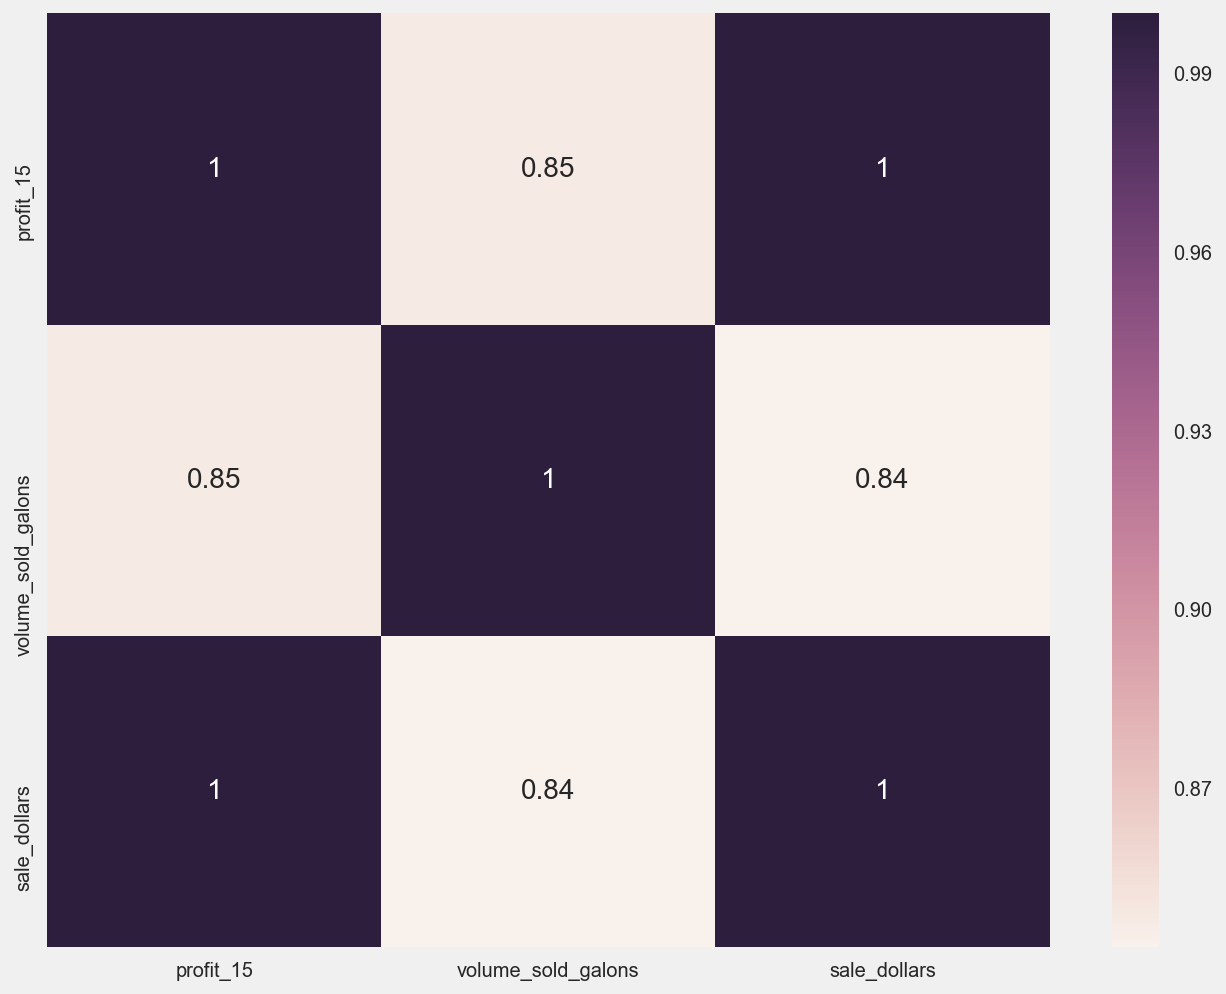

In [63]:
#Correlation matrix obtained to show the relationship between store size, sales, and proift in 2015. Source: Class jupter notebook
fig = plt.figure(figsize=(10,8))
ax = fig.gca()
sns.heatmap(JJO_15[['profit_15', 'volume_sold_galons', 'sale_dollars']].corr(),annot=True, ax=ax)
plt.show()

In [64]:
np.corrcoef(JJO_15["profit_15"], JJO_15["sale_dollars"])

array([[ 1.        ,  0.99978578],
       [ 0.99978578,  1.        ]])

### The more sales a store makes, the hihger its profitability. Hence, both variables are highly correlated as presented in the correlation matrix above.

### 5.8 The tax board wants to design a tax or taxes that affect larger stores more than smaller "mom and pop" stores.

Based on your investigations into the data, come up with a way you could design a tax that achieves this goal **without explicitly taxing stores based on size or county critera.** The liqour board does not want to obviously punish larger stores or speific counties for fear of backlash, but is willing to tax hard alcohol more than beer, for example.

Feel free to do more EDA if it helps.

Your report should describe whether such a tax is possible or not, and the specifics of what the tax will target/do.

##### I'd propose that tax rates be directly proportional to profit because stores that make more profit also make more sales as evidenced in the correlation coefficients, hence the incidence of taxation is minimal on such stores as opposed to those that makes smaller profit, which are likely to be smaller stores as well. This criteria is also more effective for government revenue generation, while avoiding serving as a disincentitive to small firms. More so, profit is highly correlated with store size, with bigger stores able to make more sales and profit, perhaps due to economies of scale which minimizes their average cost 

In [65]:
JJO_15.groupby(['store_number','volume_sold_galons'], sort=True)[['profit_15']].sum().sort_values(by=['profit_15'], ascending=False).reset_index()


,store_number,volume_sold_galons,profit_15
0,2633,174.35,70395.60
1,4829,31.70,33892.80
2,4829,2.38,30515.88
3,2633,2.38,28680.48
4,2633,3.17,27206.88
5,4829,15.85,25496.40
6,4829,9.51,24427.08
7,4829,6.34,19569.36
8,2633,6.34,19225.92
9,2512,2.38,19196.52



## 6. Case 2 = Market research for new store locations 

A liquor store owner in Iowa is looking to open a store in a new location and has hired you as a consultant to investigate the market data for potential new locations. The business owner is interested in what you can discover from the data that will help him evaluate a good location for a new storefront.

---

### 6.1 Create columns for Q1 2015 sales and Q1 2016 sales.

The owner is not just interested in what locations are currently selling well, but also which areas are showing the most promising sales growth from 2015 to 2016. 

For yearly changes we will focus on the changes from Q1 2015 to Q1 2016 specifically (avoiding effects of season changes).

Note: Q1 is months: January, February, and March.


In [66]:
#Create 2 data frames for Q1 2015 and Q1 2016, merge the two files and 

JJO_Q115= JJO_15[(JJO_15.Month <4)]  #Q1 of 2015 
JJO_Q115


,Date,store_number,City,county_number,County,Category,category_name,item_number,item_description,state_bottle_cost,state_bottle_retail,bottles_sold,sale_dollars,volume_sold_galons,Month,Year,total_cost_15,profit_15,liquor_Group,Liquor_Brand
12,2015-01-22,3858,DAVENPORT,82.0,Scott,1012100.0,CANADIAN WHISKIES,15248,Windsor Canadian Pet,8.92,13.38,1,13.38,0.46,1,2015,8.92,4.46,WHISKY,Windsor
19,2015-03-04,2614,DAVENPORT,82.0,Scott,1012100.0,CANADIAN WHISKIES,13638,Lord Calvert Canadian Whisky,9.97,14.96,6,89.76,2.77,3,2015,59.82,29.94,WHISKY,Lord
20,2015-01-16,2590,CEDAR RAPIDS,57.0,Linn,1031200.0,VODKA FLAVORED,41474,44 North Huckleberry,14.25,21.38,2,42.76,0.40,1,2015,28.50,14.26,VODKA,North
21,2015-01-13,3942,TOLEDO,86.0,Tama,1012100.0,CANADIAN WHISKIES,11786,Black Velvet Traveler,5.23,7.85,12,94.20,2.38,1,2015,62.76,31.44,WHISKY,Black
22,2015-03-24,3981,SIOUX CENTER,84.0,Sioux,1011100.0,BLENDED WHISKIES,25606,Seagrams 7 Crown Bl Whiskey,7.00,10.50,12,126.00,2.38,3,2015,84.00,42.00,WHISKY,Seagrams
25,2015-02-03,3390,MILFORD,30.0,Dickinson,1011300.0,TENNESSEE WHISKIES,26827,Jack Daniels Old #7 Black Lbl,17.90,26.85,24,644.40,6.34,2,2015,429.60,214.80,WHISKY,Jack
29,2015-01-14,2545,IOWA CITY,52.0,Johnson,1081600.0,WHISKEY LIQUEUR,66199,Piehole Apple Pie Mini,4.90,7.35,1,7.35,0.13,1,2015,4.90,2.45,CORDIALS,Piehole
31,2015-01-12,2555,KEOKUK,56.0,Lee,1081900.0,MISC. AMERICAN CORDIALS & LIQUEURS,73533,Dekuyper 03,12.07,18.11,2,36.22,0.40,1,2015,24.14,12.08,CORDIALS,Dekuyper
32,2015-01-16,2549,INDIANOLA,91.0,Warren,1031080.0,VODKA 80 PROOF,35918,Five O'clock Vodka,7.20,10.80,12,129.60,5.55,1,2015,86.40,43.20,VODKA,Five
33,2015-01-13,2644,FORT DODGE,94.0,Webster,1081305.0,APPLE SCHNAPPS,82607,Dekuyper Sour Apple,7.62,11.43,12,137.16,3.17,1,2015,91.44,45.72,SCHNAPPS,Dekuyper


In [67]:
JJO_Q115.describe()

,store_number,county_number,Category,item_number,state_bottle_cost,state_bottle_retail,bottles_sold,sale_dollars,volume_sold_galons,Month,Year,total_cost_15,profit_15
count,49791.000000,49791.000000,4.979100e+04,49791.000000,49791.000000,49791.000000,49791.000000,49791.000000,49791.000000,49791.000000,49791.0,49791.000000,49791.000000
mean,3542.737965,57.315418,1.042110e+06,46014.276677,9.653394,14.498811,9.531140,123.592535,2.291953,2.039003,2015.0,82.241534,41.351000
std,915.551565,27.141391,3.662359e+04,52523.407875,6.899029,10.348410,21.613405,343.756109,6.993191,0.825243,0.0,227.970103,115.841643
min,2106.000000,0.000000,1.011100e+06,571.000000,0.970000,1.460000,1.000000,1.460000,0.030000,1.000000,2015.0,0.970000,0.490000
25%,2603.000000,32.000000,1.012200e+06,26827.000000,5.500000,8.250000,2.000000,30.390000,0.400000,1.000000,2015.0,20.250000,10.150000
50%,3692.000000,62.000000,1.031200e+06,38176.000000,7.940000,11.990000,6.000000,69.780000,1.390000,2.000000,2015.0,46.320000,23.280000
75%,4298.000000,77.000000,1.062310e+06,64645.000000,11.750000,17.630000,12.000000,134.880000,2.770000,3.000000,2015.0,89.760000,45.000000
max,9010.000000,99.000000,1.701100e+06,995381.000000,425.000000,637.500000,1164.000000,17378.520000,538.120000,3.000000,2015.0,11290.800000,6087.720000


In [68]:
JJO_Q115.groupby(['County'], sort=True)[['sale_dollars']].sum().sort_values(by=['sale_dollars'], ascending=False).reset_index()


,County,sale_dollars
0,Polk,1340375.51
1,Linn,574464.38
2,Scott,418415.27
3,Black Hawk,340867.08
4,Johnson,322143.10
5,Pottawattamie,232750.24
6,Woodbury,230760.16
7,Story,203131.69
8,Dubuque,190977.13
9,Cerro Gordo,111299.13


In [69]:
JJO_Q116= JJO_16[(JJO_16.Month <4)]  #Q1 of 2016 represents the first quarter of the year 2016.
JJO_Q116

,Date,store_number,City,county_number,County,Category,category_name,item_number,item_description,state_bottle_cost,state_bottle_retail,bottles_sold,sale_dollars,volume_sold_galons,Month,Year,total_cost_16,profit_16,liquor_Group,Liquor_Brand
1,2016-03-02,2614,DAVENPORT,82.0,Scott,1011100.0,BLENDED WHISKIES,27605,Tin Cup,13.75,20.63,2,41.26,0.40,3,2016,27.50,13.76,WHISKY,Tin
2,2016-02-11,2106,CEDAR FALLS,7.0,Black Hawk,1011200.0,STRAIGHT BOURBON WHISKIES,19067,Jim Beam,12.59,18.89,24,453.36,6.34,2,2016,302.16,151.20,WHISKY,Jim
3,2016-02-03,2501,AMES,85.0,Story,1071100.0,AMERICAN COCKTAILS,59154,1800 Ultimate Margarita,9.50,14.25,6,85.50,2.77,2,2016,57.00,28.50,OTHERS,Ultimate
8,2016-01-04,4757,BONDURANT,77.0,Polk,1032080.0,IMPORTED VODKA,34006,Absolut Swedish Vodka 80 Prf,11.49,17.24,4,68.96,0.79,1,2016,45.96,23.00,VODKA,Absolut
13,2016-02-29,4673,WEST POINT,56.0,Lee,1081300.0,PEPPERMINT SCHNAPPS,75211,Kinky Liqueur,10.00,15.00,12,180.00,2.38,2,2016,120.00,60.00,SCHNAPPS,Kinky
14,2016-01-04,2670,CORALVILLE,52.0,Johnson,1031200.0,VODKA FLAVORED,41705,Uv Red (cherry) Vodka,7.50,11.25,12,135.00,3.17,1,2016,90.00,45.00,VODKA,Uv
16,2016-02-25,2130,WATERLOO,7.0,Black Hawk,1031100.0,100 PROOF VODKA,35913,Five O'clock Vodka,1.13,1.70,48,81.60,2.54,2,2016,54.24,27.36,VODKA,Five
24,2016-03-14,2618,CEDAR RAPIDS,57.0,Linn,1031080.0,VODKA 80 PROOF,35926,Five O'clock PET Vodka,3.37,5.06,12,60.72,2.38,3,2016,40.44,20.28,VODKA,Five
38,2016-01-27,2637,DAVENPORT,82.0,Scott,1081900.0,MISC. AMERICAN CORDIALS & LIQUEURS,77759,Viniq Ruby,6.50,9.75,12,117.00,1.19,1,2016,78.00,39.00,CORDIALS,Viniq
39,2016-03-07,2633,DES MOINES,77.0,Polk,1011200.0,STRAIGHT BOURBON WHISKIES,22157,Wild Turkey 101,16.16,24.24,12,290.88,3.17,3,2016,193.92,96.96,WHISKY,Wild


In [70]:
JJO_Q116.describe()

,store_number,county_number,Category,item_number,state_bottle_cost,state_bottle_retail,bottles_sold,sale_dollars,volume_sold_galons,Month,Year,total_cost_16,profit_16
count,52361.00000,52361.000000,5.236100e+04,52361.000000,52361.000000,52361.000000,52361.000000,52361.000000,52361.000000,52361.000000,52361.0,52361.00000,52361.000000
mean,3638.53834,56.353756,1.042228e+06,46087.836959,9.780521,14.678661,9.540765,122.218780,2.256063,2.066634,2016.0,81.40011,40.818671
std,968.67321,28.326017,3.882274e+04,53556.541185,7.153706,10.729452,22.252511,367.610283,7.123216,0.816869,0.0,244.37752,123.257850
min,2106.00000,0.000000,0.000000e+00,168.000000,0.890000,1.340000,1.000000,1.500000,0.030000,1.000000,2016.0,1.00000,0.500000
25%,2611.00000,31.000000,1.012200e+06,26827.000000,5.500000,8.250000,2.000000,30.000000,0.400000,1.000000,2016.0,20.00000,10.000000
50%,3757.00000,62.000000,1.031200e+06,38176.000000,8.000000,12.000000,6.000000,68.580000,1.270000,2.000000,2016.0,45.72000,22.880000
75%,4477.00000,77.000000,1.062310e+06,64573.000000,11.960000,17.940000,12.000000,134.880000,2.770000,3.000000,2016.0,89.88000,45.000000
max,9023.00000,99.000000,1.701100e+06,994763.000000,280.000000,420.000000,1800.000000,32184.000000,538.120000,3.000000,2016.0,21456.00000,10728.000000


In [72]:
#Merging the Q1 2015 and Q1 2016 together 
JJO_Q1Q2 = JJO_Q115.append(JJO_Q116, ignore_index=True)
JJO_Q1Q2

,Category,City,County,Date,Liquor_Brand,Month,Year,bottles_sold,category_name,county_number,...,liquor_Group,profit_15,profit_16,sale_dollars,state_bottle_cost,state_bottle_retail,store_number,total_cost_15,total_cost_16,volume_sold_galons
0,1012100.0,DAVENPORT,Scott,2015-01-22,Windsor,1,2015,1,CANADIAN WHISKIES,82.0,...,WHISKY,4.46,NaN,13.38,8.92,13.38,3858,8.92,NaN,0.46
1,1012100.0,DAVENPORT,Scott,2015-03-04,Lord,3,2015,6,CANADIAN WHISKIES,82.0,...,WHISKY,29.94,NaN,89.76,9.97,14.96,2614,59.82,NaN,2.77
2,1031200.0,CEDAR RAPIDS,Linn,2015-01-16,North,1,2015,2,VODKA FLAVORED,57.0,...,VODKA,14.26,NaN,42.76,14.25,21.38,2590,28.50,NaN,0.40
3,1012100.0,TOLEDO,Tama,2015-01-13,Black,1,2015,12,CANADIAN WHISKIES,86.0,...,WHISKY,31.44,NaN,94.20,5.23,7.85,3942,62.76,NaN,2.38
4,1011100.0,SIOUX CENTER,Sioux,2015-03-24,Seagrams,3,2015,12,BLENDED WHISKIES,84.0,...,WHISKY,42.00,NaN,126.00,7.00,10.50,3981,84.00,NaN,2.38
5,1011300.0,MILFORD,Dickinson,2015-02-03,Jack,2,2015,24,TENNESSEE WHISKIES,30.0,...,WHISKY,214.80,NaN,644.40,17.90,26.85,3390,429.60,NaN,6.34
6,1081600.0,IOWA CITY,Johnson,2015-01-14,Piehole,1,2015,1,WHISKEY LIQUEUR,52.0,...,CORDIALS,2.45,NaN,7.35,4.90,7.35,2545,4.90,NaN,0.13
7,1081900.0,KEOKUK,Lee,2015-01-12,Dekuyper,1,2015,2,MISC. AMERICAN CORDIALS & LIQUEURS,56.0,...,CORDIALS,12.08,NaN,36.22,12.07,18.11,2555,24.14,NaN,0.40
8,1031080.0,INDIANOLA,Warren,2015-01-16,Five,1,2015,12,VODKA 80 PROOF,91.0,...,VODKA,43.20,NaN,129.60,7.20,10.80,2549,86.40,NaN,5.55
9,1081305.0,FORT DODGE,Webster,2015-01-13,Dekuyper,1,2015,12,APPLE SCHNAPPS,94.0,...,SCHNAPPS,45.72,NaN,137.16,7.62,11.43,2644,91.44,NaN,3.17


In [73]:
JJO_Q1Q2.groupby(['store_number', 'Month', 'Year'], sort=True)[['sale_dollars']].sum().sort_values(by=['sale_dollars'], ascending=False).reset_index()


,store_number,Month,Year,sale_dollars
0,2633,3,2016,77512.36
1,2633,2,2016,76345.57
2,4829,3,2016,75997.68
3,2633,1,2015,75452.85
4,4829,2,2016,72481.14
5,4829,1,2015,71197.89
6,4829,3,2015,71078.42
7,2633,3,2015,70024.35
8,3385,3,2015,66538.95
9,2633,1,2016,65693.86


In [74]:
#Code obtained to generate the quarterly sales for Q1 2015 and Q1 2016 in Iowa. Source: Code generated in partnership with Kira.
Q1_2015=JJO_Q115.groupby(['County'], sort=True)[['sale_dollars']].sum().sort_values(by=['sale_dollars'], ascending=False).reset_index()
Q1_2015.rename(columns={
        'sale_dollars':'Q1_2015_Sales'
    }, inplace=True) 
Q1_2015

Q1_2016=JJO_Q116.groupby(['County'], sort=True)[['sale_dollars']].sum().sort_values(by=['sale_dollars'], ascending=False).reset_index()
Q1_2016.rename(columns={
        'sale_dollars':'Q1_2016_Sales'
    }, inplace=True) 
Q1_2016

JJO2=pd.merge(Q1_2015,Q1_2016,on=['County'],how='right')
JJO2

,County,Q1_2015_Sales,Q1_2016_Sales
0,Polk,1340375.51,1383147.02
1,Linn,574464.38,544102.21
2,Scott,418415.27,424554.73
3,Black Hawk,340867.08,353707.78
4,Johnson,322143.10,371388.76
5,Pottawattamie,232750.24,267327.82
6,Woodbury,230760.16,252574.99
7,Story,203131.69,188038.23
8,Dubuque,190977.13,193566.86
9,Cerro Gordo,111299.13,126037.11


### 6.2 Decide on a metric for performance that combines Q1 2016 sales as well as growth in sales from Q1 2015.

Again, the owner wants to know that his store will be in a good position to sell a large amount of liquor now, but also have his store be more likely to grow and sell even more going forward. 

In particular, he is worried about opening a store in an area that is showing a decline in liquor sales between Q1 2015 and Q1 2016.

In [75]:
#Merging the Q1 2015 and Q1 2016 together 
#JJO_Q1Q2 = pd.merge(JJO_Q115,JJO_Q116, on=['County'],how='right')
#JJO_Q1Q2

In [76]:
#JJO_Q1Q2.groupby(['County', 'Year'], sort=True)[['profit_16']].sum().sort_values(by=['profit_16'], ascending=False).reset_index()


In [77]:

JJO2['change_sales'] = JJO2['Q1_2016_Sales']-JJO2['Q1_2015_Sales']
JJO2

,County,Q1_2015_Sales,Q1_2016_Sales,change_sales
0,Polk,1340375.51,1383147.02,42771.51
1,Linn,574464.38,544102.21,-30362.17
2,Scott,418415.27,424554.73,6139.46
3,Black Hawk,340867.08,353707.78,12840.70
4,Johnson,322143.10,371388.76,49245.66
5,Pottawattamie,232750.24,267327.82,34577.58
6,Woodbury,230760.16,252574.99,21814.83
7,Story,203131.69,188038.23,-15093.46
8,Dubuque,190977.13,193566.86,2589.73
9,Cerro Gordo,111299.13,126037.11,14737.98


In [78]:
JJO2['growth_sales'] = JJO2['change_sales']/JJO2['Q1_2015_Sales']*100
JJO2

,County,Q1_2015_Sales,Q1_2016_Sales,change_sales,growth_sales
0,Polk,1340375.51,1383147.02,42771.51,3.191010
1,Linn,574464.38,544102.21,-30362.17,-5.285301
2,Scott,418415.27,424554.73,6139.46,1.467313
3,Black Hawk,340867.08,353707.78,12840.70,3.767070
4,Johnson,322143.10,371388.76,49245.66,15.286890
5,Pottawattamie,232750.24,267327.82,34577.58,14.856088
6,Woodbury,230760.16,252574.99,21814.83,9.453465
7,Story,203131.69,188038.23,-15093.46,-7.430382
8,Dubuque,190977.13,193566.86,2589.73,1.356042
9,Cerro Gordo,111299.13,126037.11,14737.98,13.241775


In [79]:
JJO2.groupby(['County'], sort=True)[['growth_sales']].sum().sort_values(by=['growth_sales'], ascending=False).reset_index()

,County,growth_sales
0,Cedar,100.430875
1,Worth,95.293116
2,Fayette,83.784098
3,Butler,82.837679
4,Crawford,79.616601
5,Ida,64.641047
6,Appanoose,41.143899
7,Decatur,40.436539
8,Calhoun,39.300185
9,Tama,37.167397


### 6.3 Recommend a location based on your metric.

The owner asks you to make a recommendation for a new store location. Explain why you recommended this area.

### Based on the new metric, I recommend investing in counties that posted higher growth rate in sales sales in Q1 2016 over Q1 2015, in this case, Ida. This also makes sense when taking the profitability in counties into account, with polk posting the most impressive figures throughout the year under review, and hence, the first quarter of the year.

### 6.4 Recommend a location based also on a restricted inventory type.

Your employer has now decided he wants his store to focus on one type of liquor only. He askes you:

1. What would be the best type of liquor to sell to maximize profit?
2. Should the recommended location change if he is only selling one type of liquor?

In [80]:
JJO_16.groupby(['liquor_Group','Year','County'], sort=True)[['sale_dollars']].sum().sort_values(by=['sale_dollars'], ascending=False).reset_index()


,liquor_Group,Year,County,sale_dollars
0,VODKA,2016,Polk,397443.28
1,WHISKY,2016,Polk,341922.66
2,CORDIALS,2016,Polk,187592.35
3,VODKA,2016,Linn,141395.21
4,RUM,2016,Polk,140831.75
5,WHISKY,2016,Linn,130803.92
6,OTHERS,2016,Polk,124302.52
7,VODKA,2016,Scott,108630.78
8,WHISKY,2016,Scott,107481.20
9,VODKA,2016,Johnson,104235.31


In [81]:
JJO_15.groupby(['liquor_Group','Year','County'], sort=True)[['sale_dollars']].sum().sort_values(by=['sale_dollars'], ascending=False).reset_index()


,liquor_Group,Year,County,sale_dollars
0,VODKA,2015,Polk,1699365.36
1,WHISKY,2015,Polk,1681531.36
2,CORDIALS,2015,Polk,812624.30
3,RUM,2015,Polk,752935.10
4,WHISKY,2015,Linn,704567.54
5,OTHERS,2015,Polk,692927.82
6,VODKA,2015,Linn,667584.30
7,WHISKY,2015,Scott,545358.10
8,VODKA,2015,Scott,509958.27
9,WHISKY,2015,Johnson,486839.28


In [82]:
Q1_2015=JJO_Q115.groupby(['County','liquor_Group'], sort=True)[['sale_dollars']].sum().sort_values(by=['sale_dollars'], ascending=False).reset_index()
Q1_2015.rename(columns={
        'sale_dollars':'Q1_2015_Sales'
    }, inplace=True) 
Q1_2015

Q1_2016=JJO_Q116.groupby(['County','liquor_Group'], sort=True)[['sale_dollars']].sum().sort_values(by=['sale_dollars'], ascending=False).reset_index()
Q1_2016.rename(columns={
        'sale_dollars':'Q1_2016_Sales'
    }, inplace=True) 
Q1_2016

JJO2=pd.merge(Q1_2015,Q1_2016,on=['County','liquor_Group'],how='right')
JJO2


,County,liquor_Group,Q1_2015_Sales,Q1_2016_Sales
0,Polk,WHISKY,371181.56,341922.66
1,Polk,VODKA,351255.57,397443.28
2,Linn,WHISKY,173336.02,130803.92
3,Polk,RUM,172825.12,140831.75
4,Polk,CORDIALS,172299.10,187592.35
5,Linn,VODKA,137177.31,141395.21
6,Polk,OTHERS,117700.02,124302.52
7,Scott,WHISKY,115651.23,107481.20
8,Johnson,WHISKY,94018.19,100261.03
9,Scott,VODKA,91965.81,108630.78


#### Decision on the best type of liquor sale should be predicated upon the profitablity and growth in sales over a period of one  quarter which provides same platform for comparing both periods, given that 2016 accounting year remained open in the dataset. Hence, Vodka posted both higher growth in sales in dollar terms as well as profit margins than other types of Liqour. Additionally, it posted the highest growth rate over the first quarter of both years, a reflection of increasing demand for the brand. This should therefore, yield quicker returns on investment than the other brands. In terms of location, I would strongly recommend investing in Cedar, as most of the brands post impressive growth in sales in the county, in addition to the fact that  Vodka posted the highest growth rate in Cedar. In terms of absolute dollar sales, Polk generated more sales. However, growth in sales is a better reflection of increasing demand, hence my recommendation of investing in Cedar.